In [85]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [86]:
#Importation des bibliothèques
import fonctions as f

In [87]:
# Configurer la taille des images globalement
f.plt.rcParams['figure.figsize'] = [12, 8]  # Largeur, hauteur en pouces

In [88]:
df = f.pd.read_csv("base.csv")
df.head()

DATE    RR   TN     HTN   TX     HTX   TM  TMNX     DG  TAMPLI  ...  \
0  2022-01-05   2.6 -0.4  1759.0  3.4  1217.0  0.9  1.50  389.0     3.8  ...   
1  2022-01-06   0.0 -2.5  1746.0  4.3  1327.0 -0.6  0.90  964.0     6.8  ...   
2  2022-01-07  10.0 -6.9   718.0  1.6  2229.0 -1.2 -2.65  674.0     8.5  ...   
3  2022-01-08  13.2 -0.7   733.0  6.3  2319.0  2.4  2.80   87.0     7.0  ...   
4  2022-01-09   7.6  0.4   737.0  2.2   601.0  1.8  1.30    0.0     1.8  ...   

      HUN    UX     HUX  DHUMI40  DHUMI80  TSVM    UM  ETPGRILLE  NEIGETOTX  \
0  1244.0  99.0   329.0      0.0   1157.0   5.7  88.0        0.4        0.0   
1  1032.0  99.0  2304.0      0.0   1043.0   5.1  88.0        0.6        0.0   
2   708.0  99.0   126.0      0.0   1440.0   5.4  96.0        0.0        0.0   
3  1403.0  99.0   618.0      0.0   1231.0   6.4  89.0        0.5        0.0   
4     3.0  98.0   745.0      0.0   1440.0   6.5  94.0        0.1        0.0   

   NEIGETOT06  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 31 columns]

In [89]:
df_c=df

In [90]:
# Convertir 'DATE' en type datetime
df_c['DATE'] = f.pd.to_datetime(df_c['DATE'])

In [91]:
df_c.head()

DATE    RR   TN     HTN   TX     HTX   TM  TMNX     DG  TAMPLI  ...  \
0 2022-01-05   2.6 -0.4  1759.0  3.4  1217.0  0.9  1.50  389.0     3.8  ...   
1 2022-01-06   0.0 -2.5  1746.0  4.3  1327.0 -0.6  0.90  964.0     6.8  ...   
2 2022-01-07  10.0 -6.9   718.0  1.6  2229.0 -1.2 -2.65  674.0     8.5  ...   
3 2022-01-08  13.2 -0.7   733.0  6.3  2319.0  2.4  2.80   87.0     7.0  ...   
4 2022-01-09   7.6  0.4   737.0  2.2   601.0  1.8  1.30    0.0     1.8  ...   

      HUN    UX     HUX  DHUMI40  DHUMI80  TSVM    UM  ETPGRILLE  NEIGETOTX  \
0  1244.0  99.0   329.0      0.0   1157.0   5.7  88.0        0.4        0.0   
1  1032.0  99.0  2304.0      0.0   1043.0   5.1  88.0        0.6        0.0   
2   708.0  99.0   126.0      0.0   1440.0   5.4  96.0        0.0        0.0   
3  1403.0  99.0   618.0      0.0   1231.0   6.4  89.0        0.5        0.0   
4     3.0  98.0   745.0      0.0   1440.0   6.5  94.0        0.1        0.0   

   NEIGETOT06  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 31 columns]

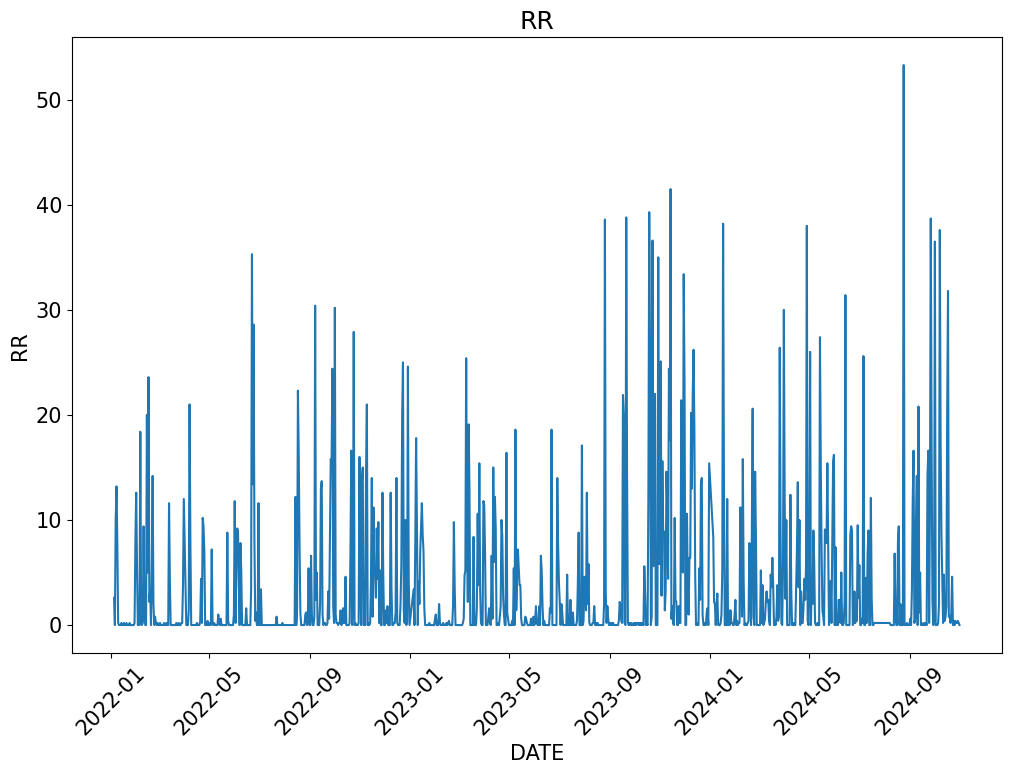

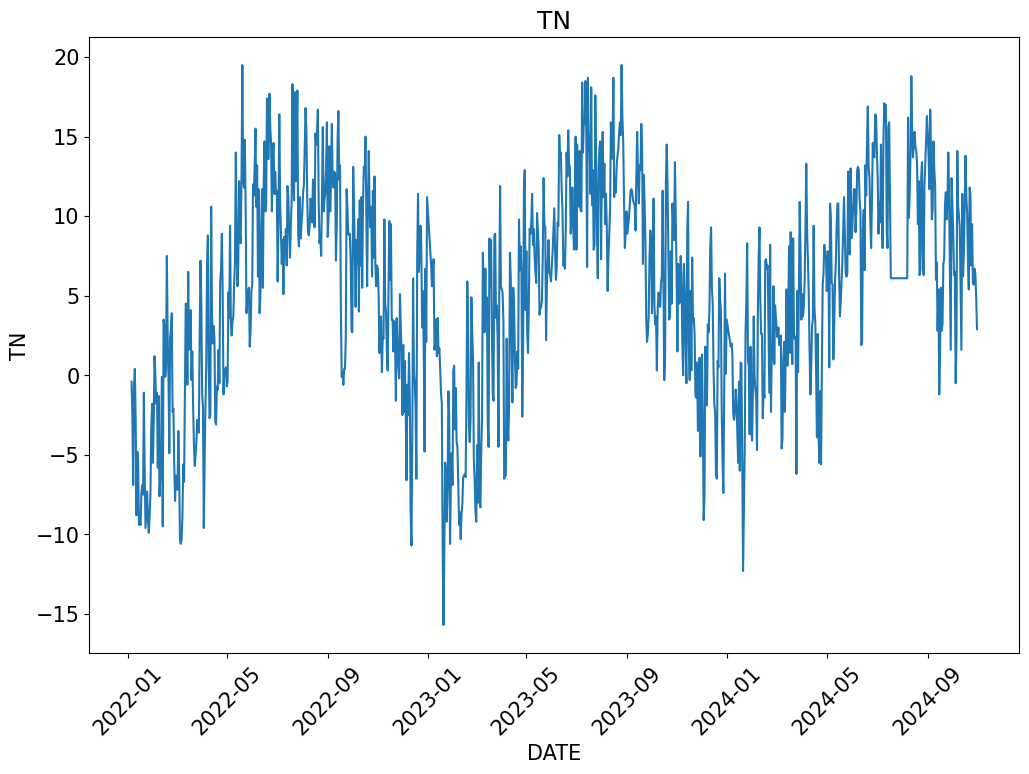

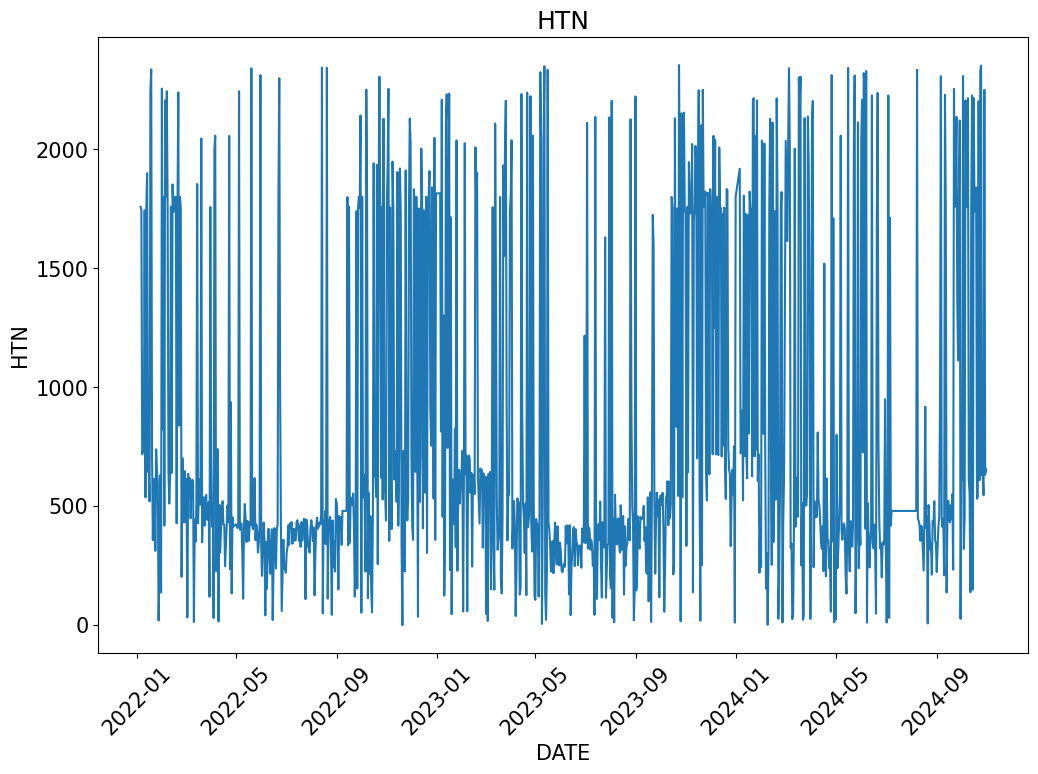

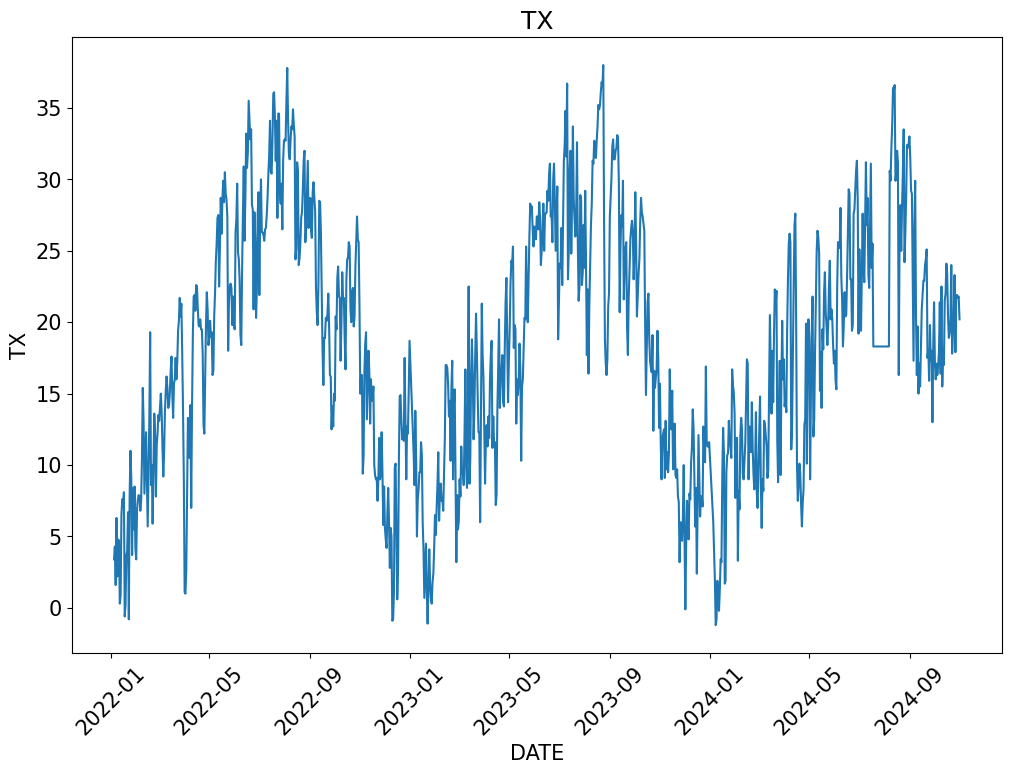

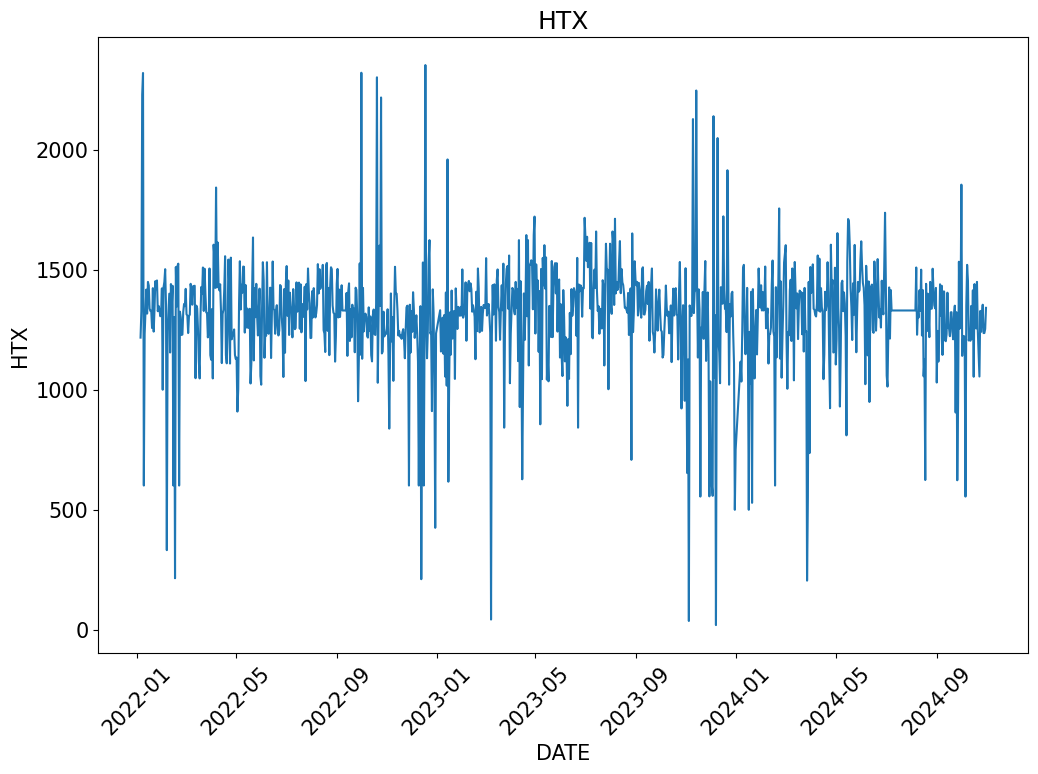

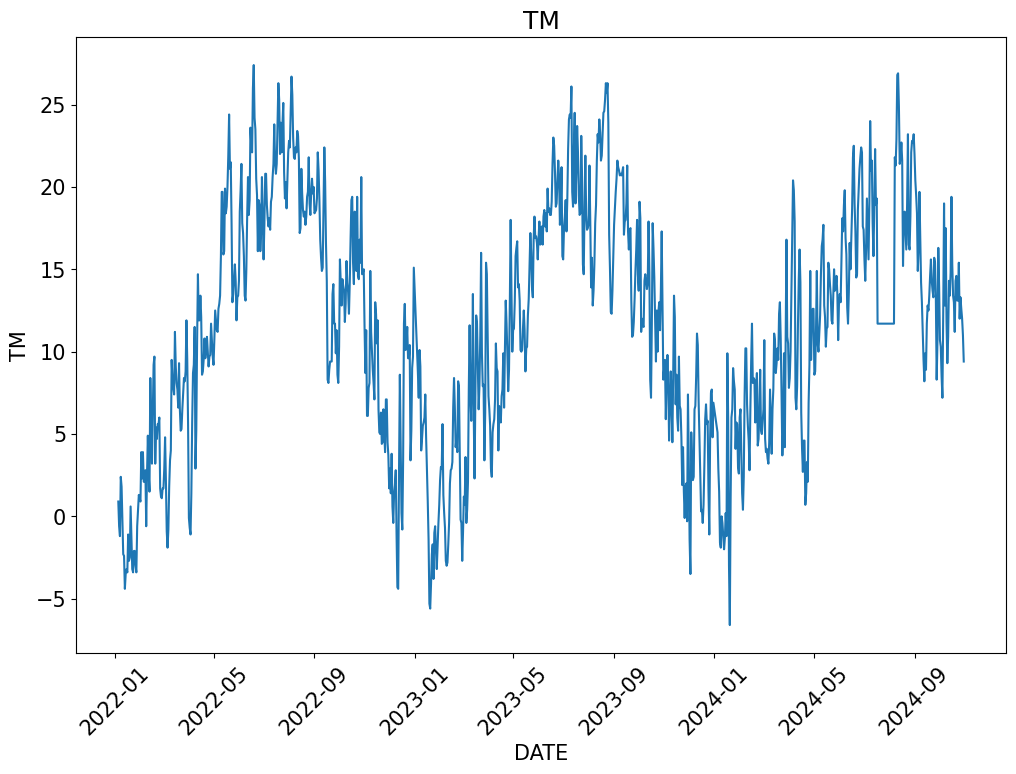

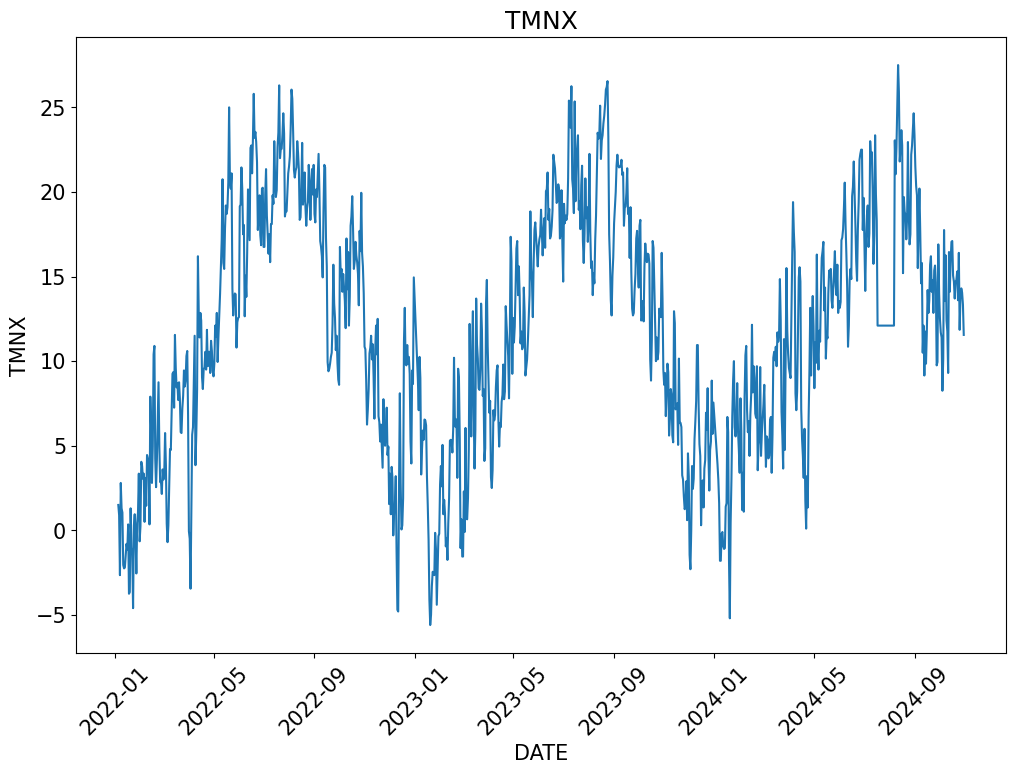

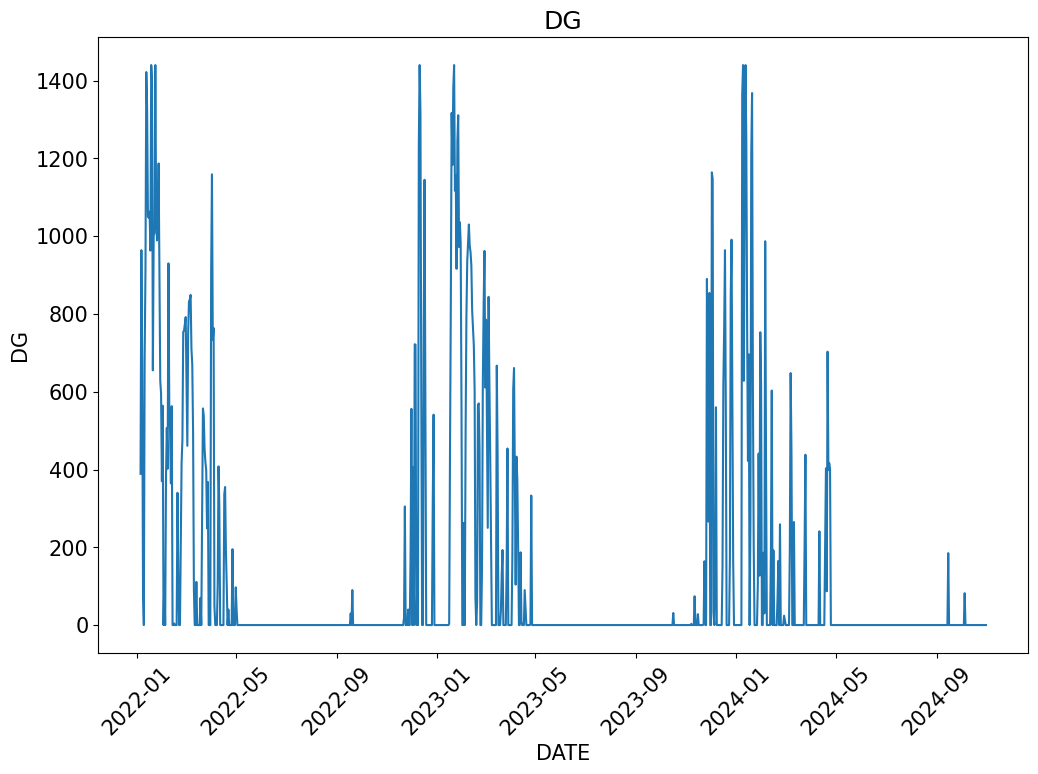

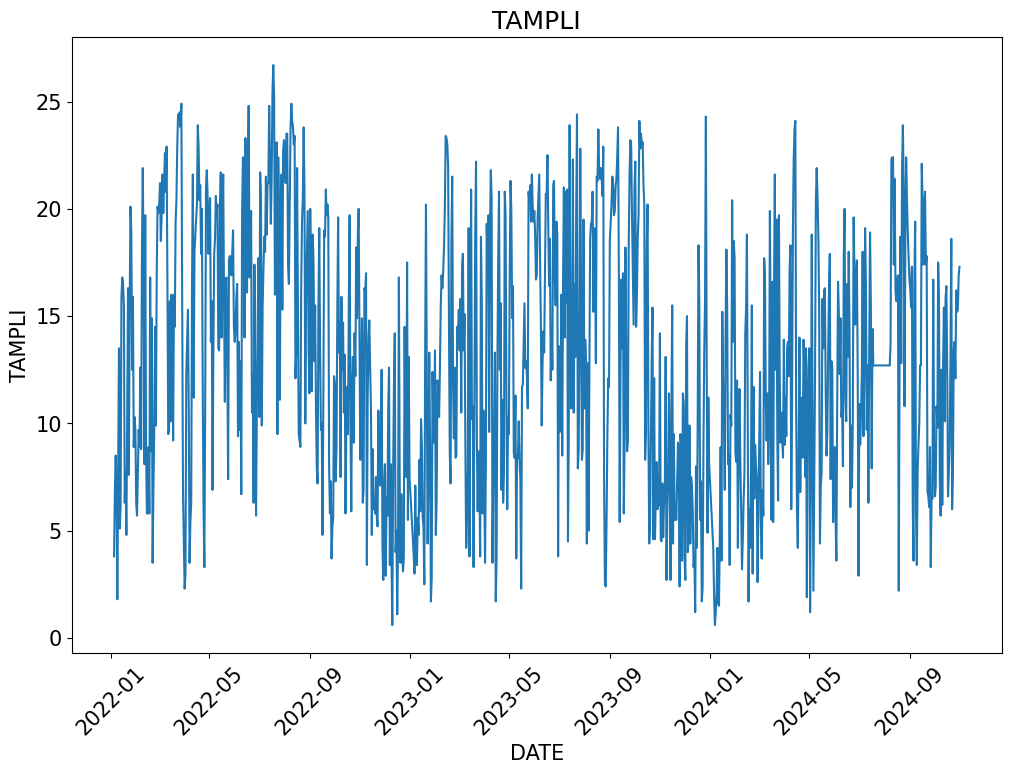

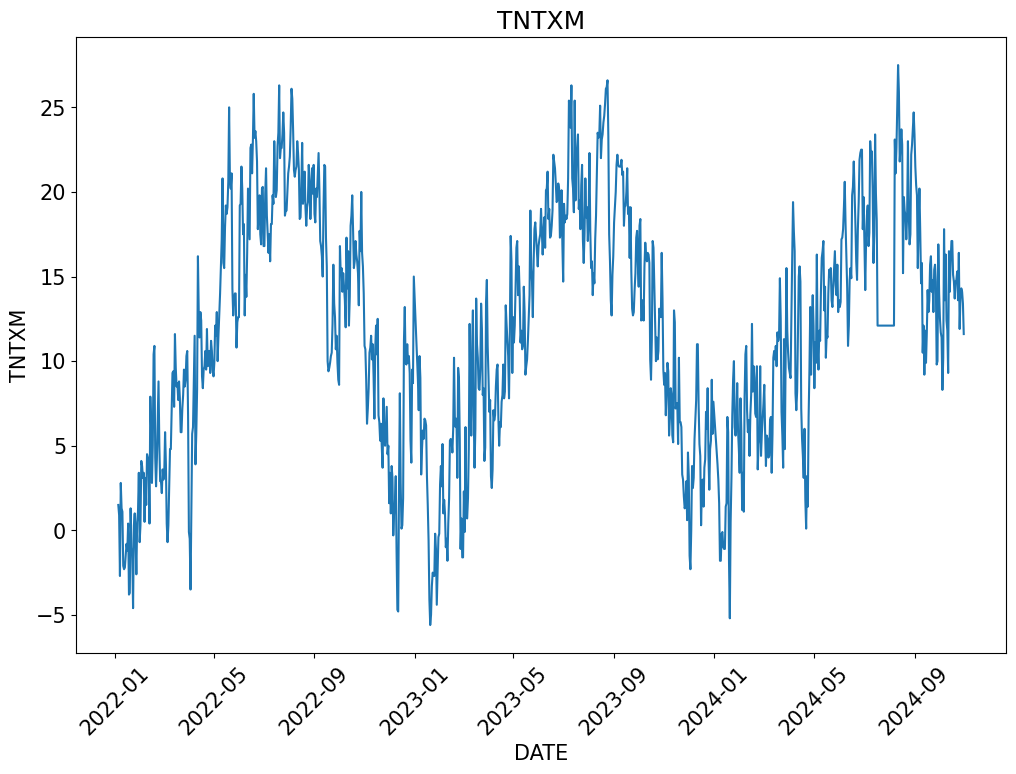

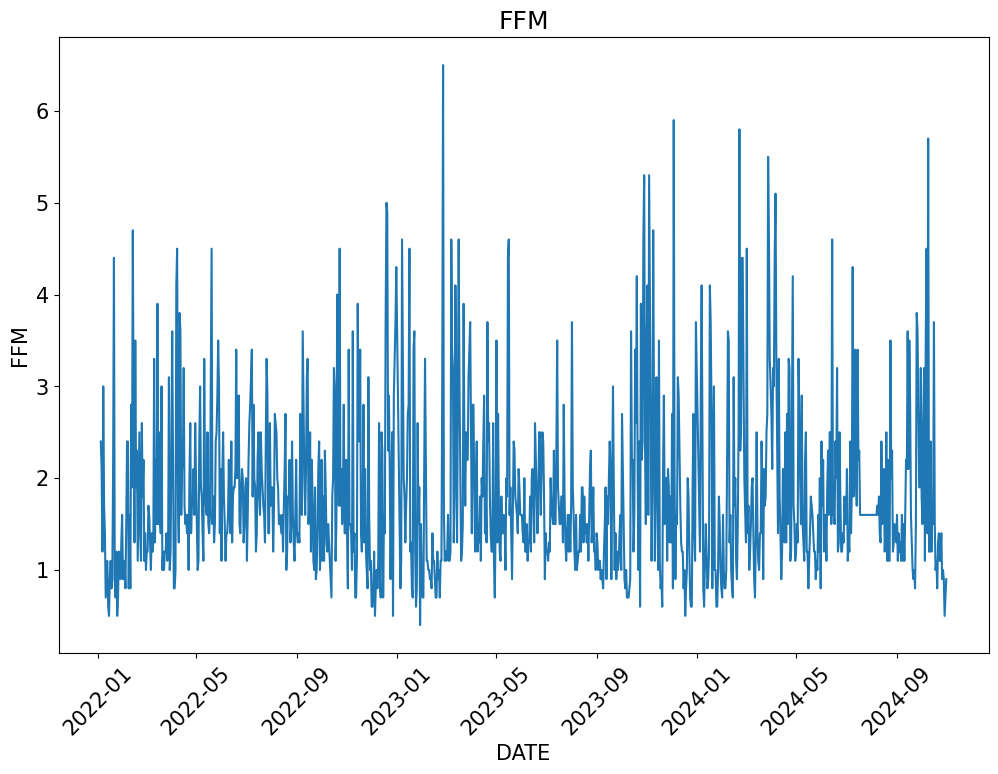

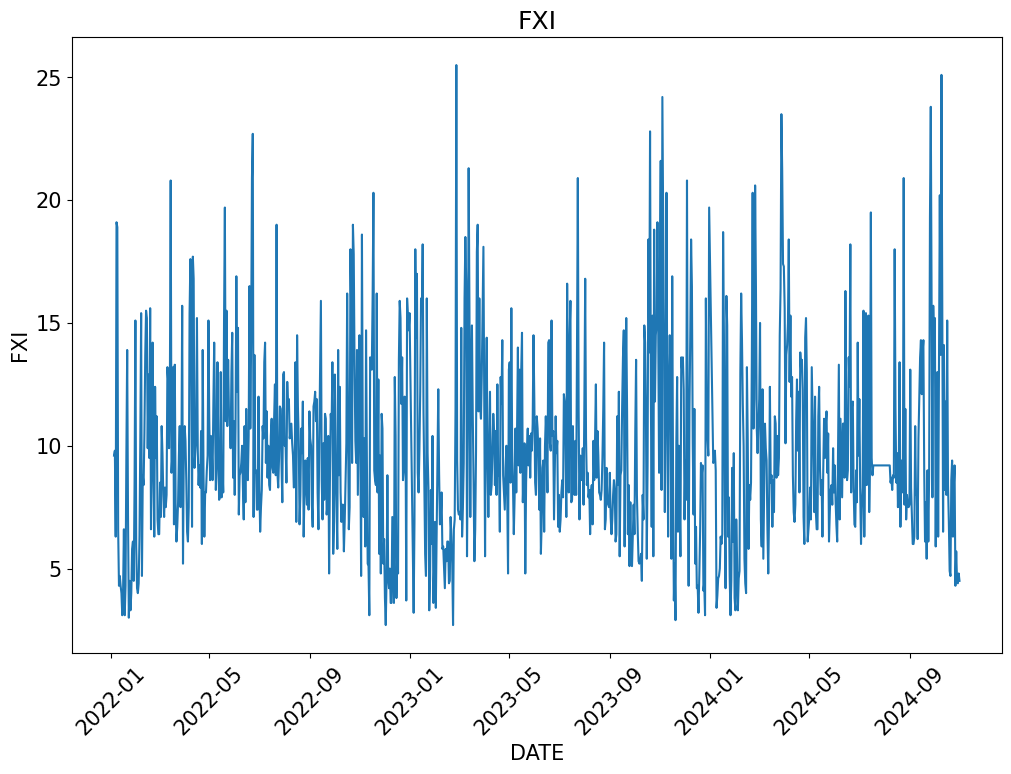

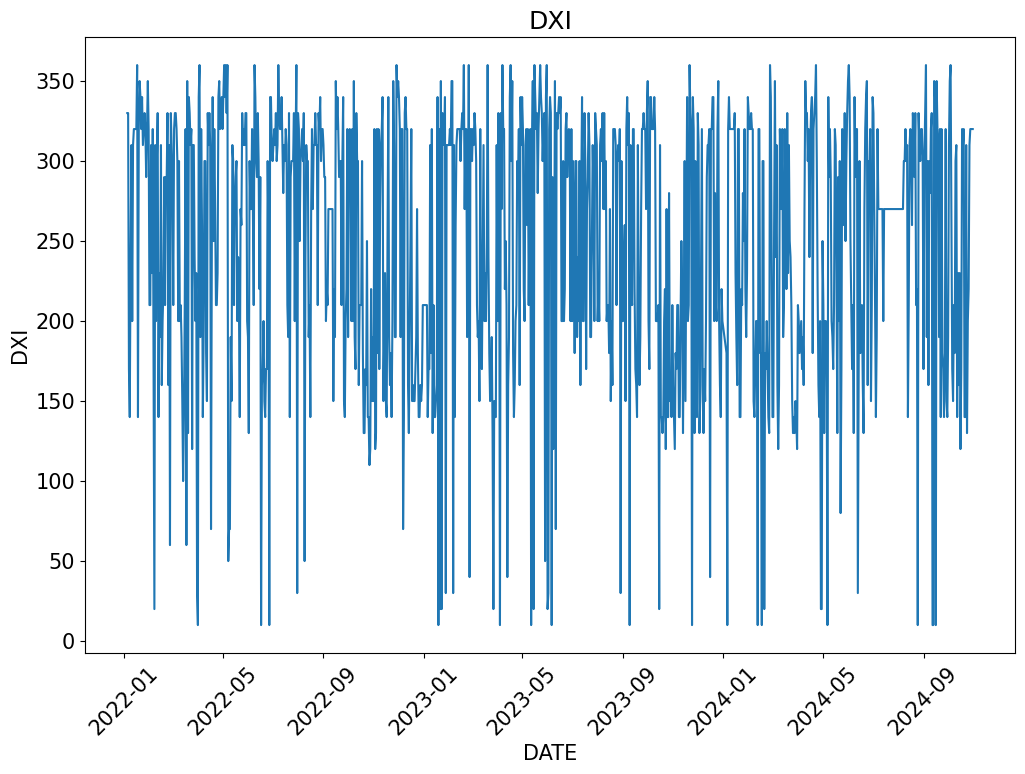

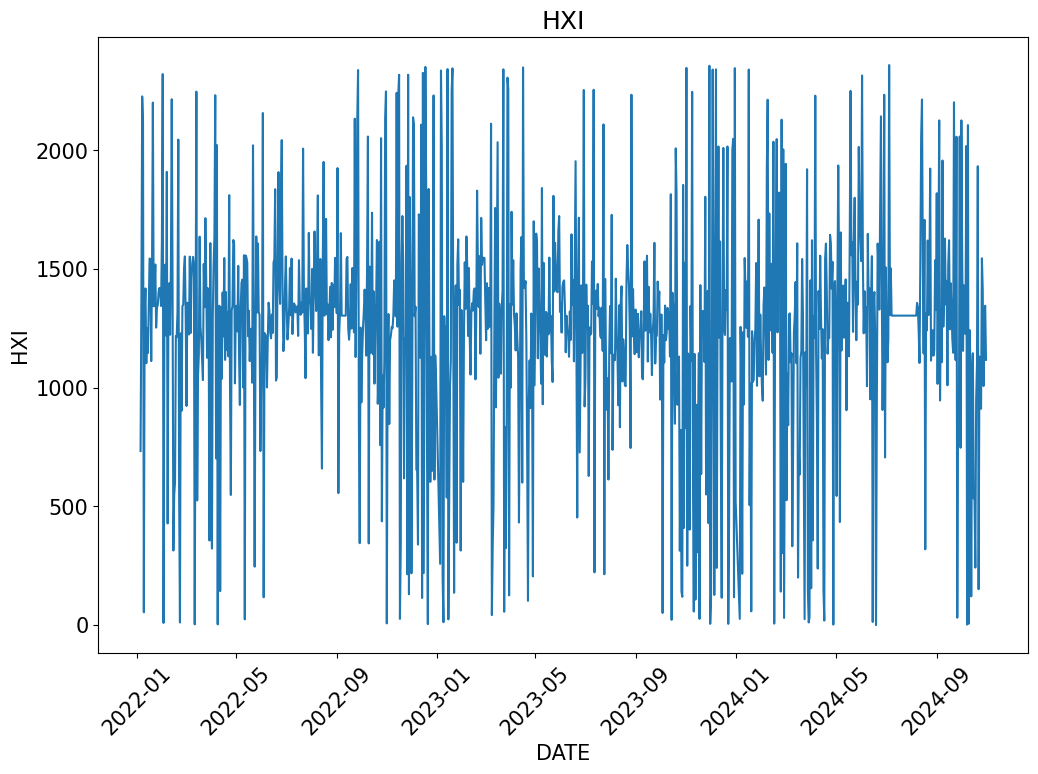

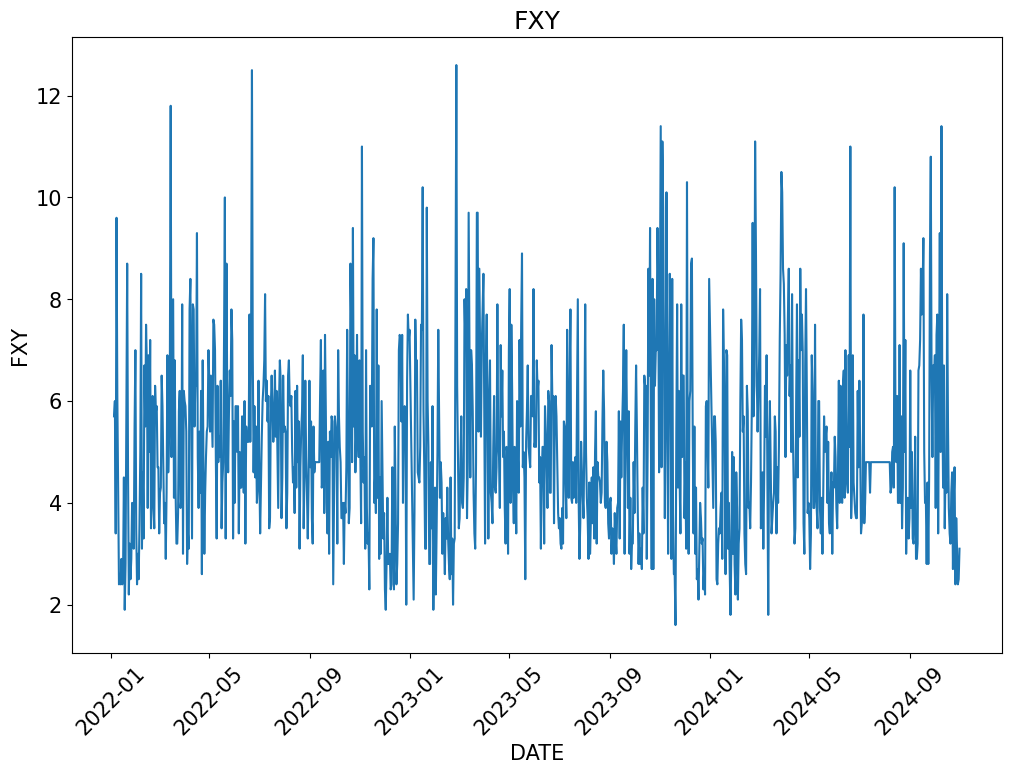

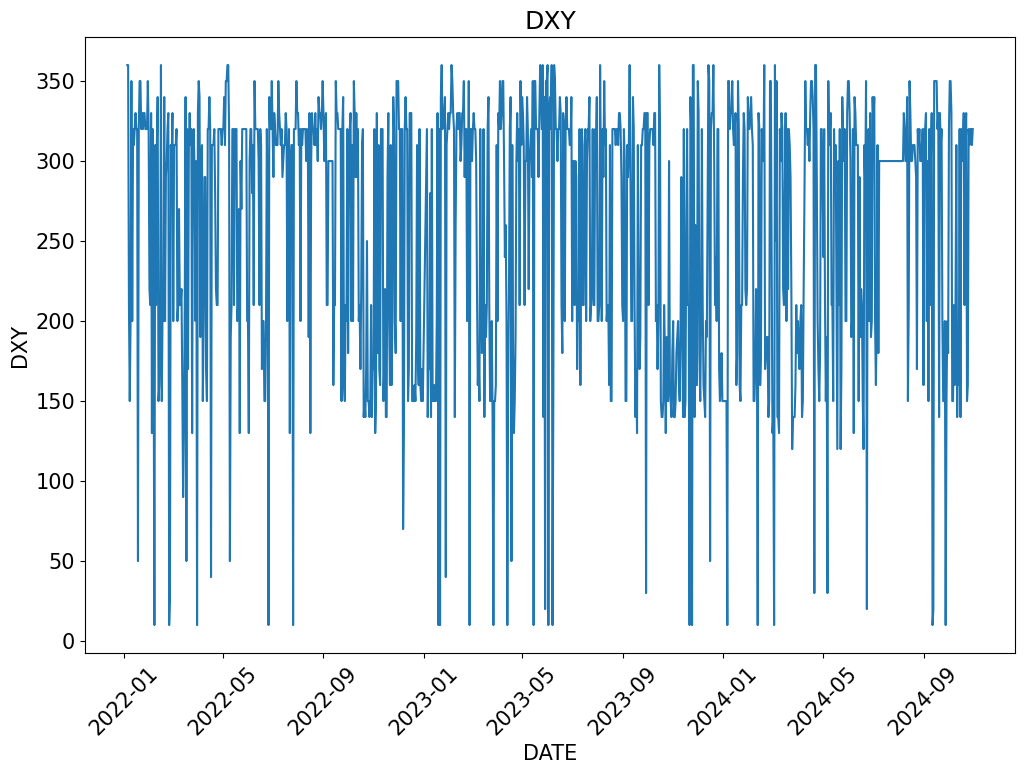

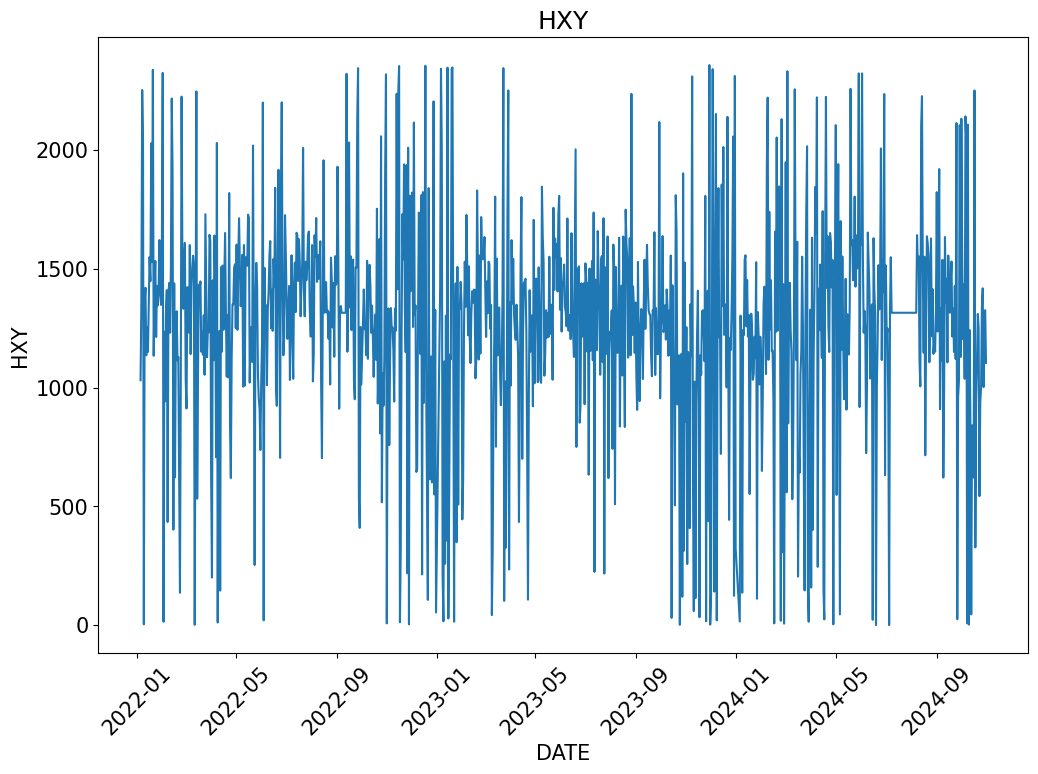

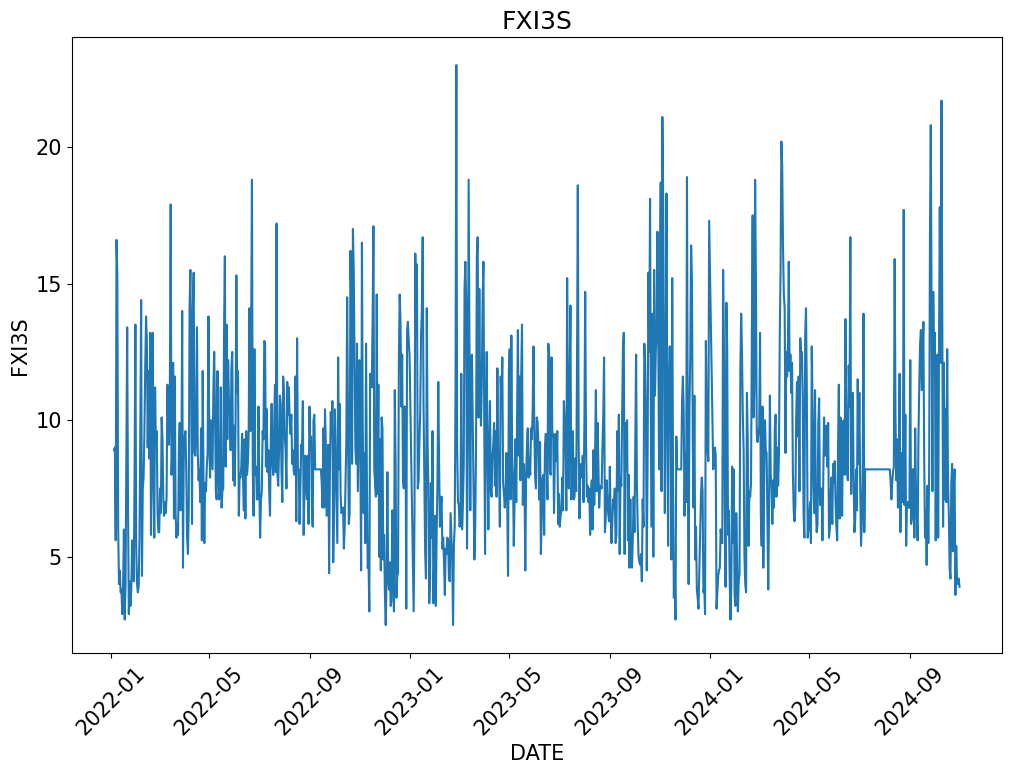

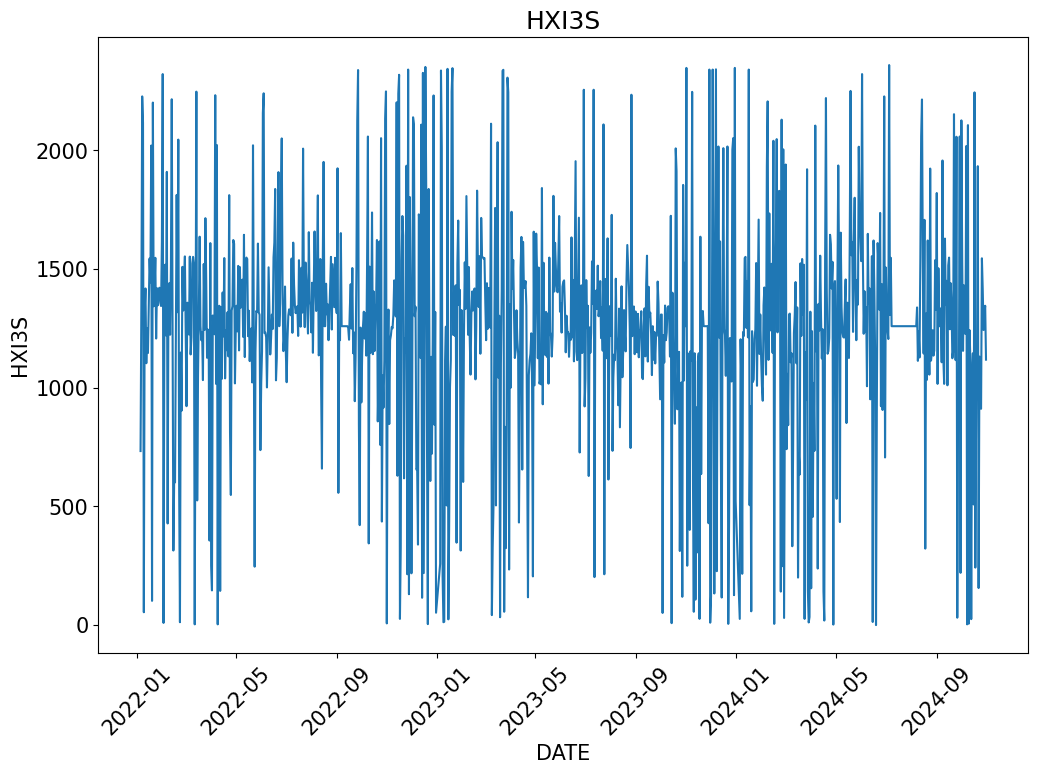

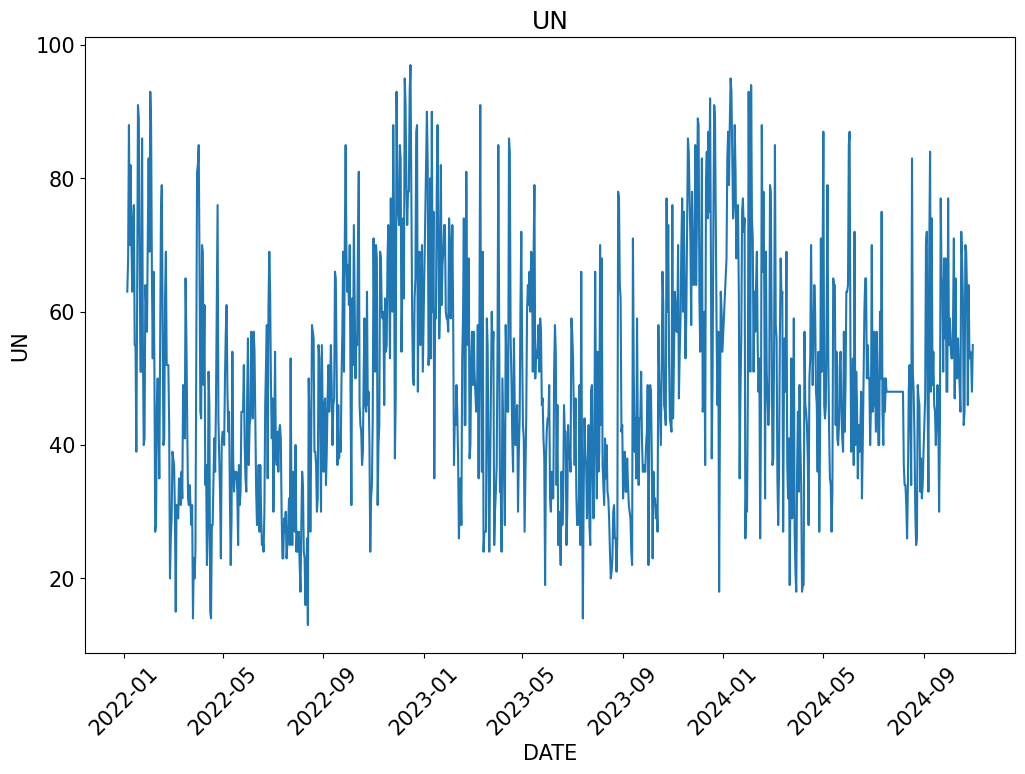

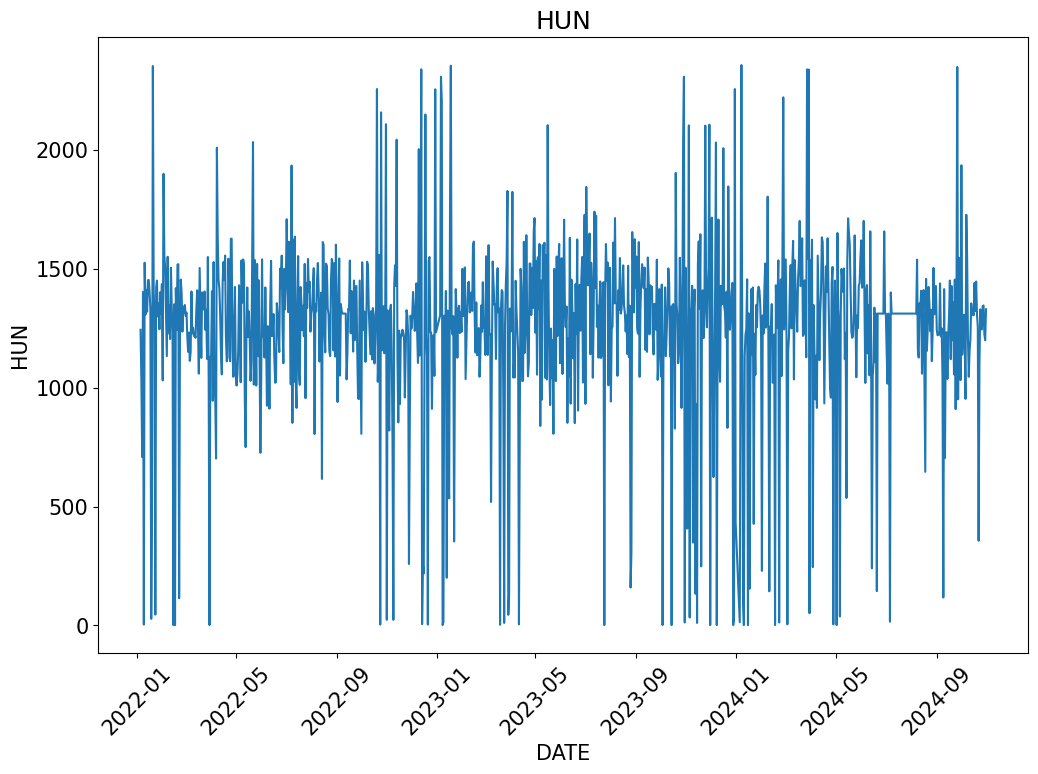

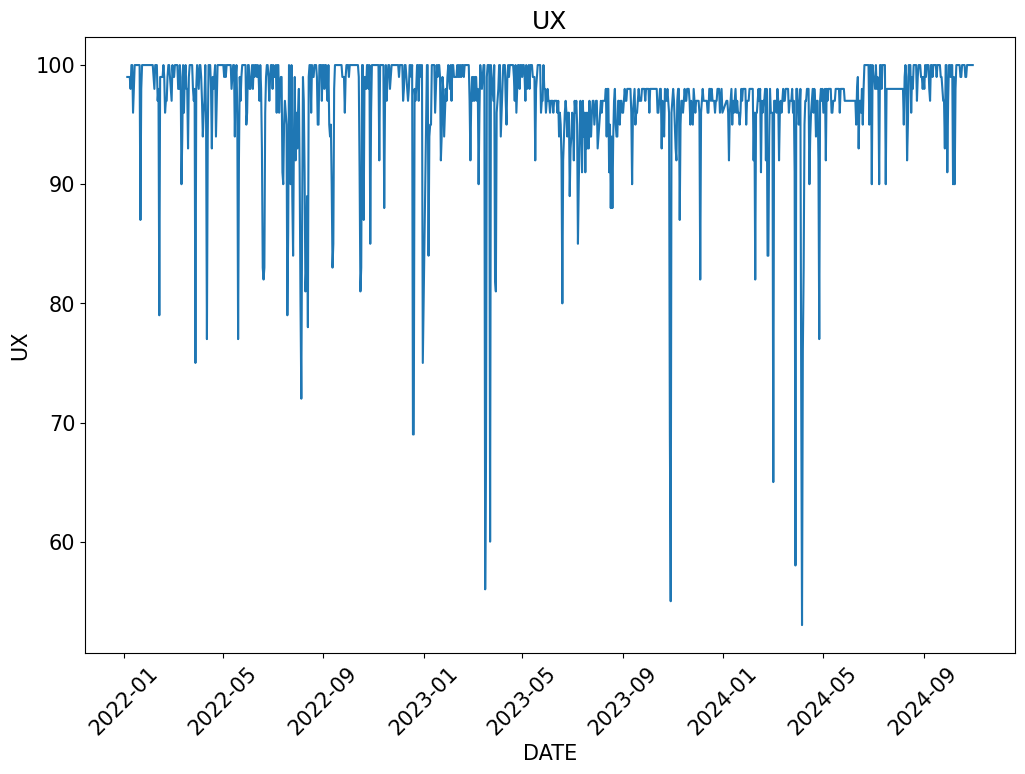

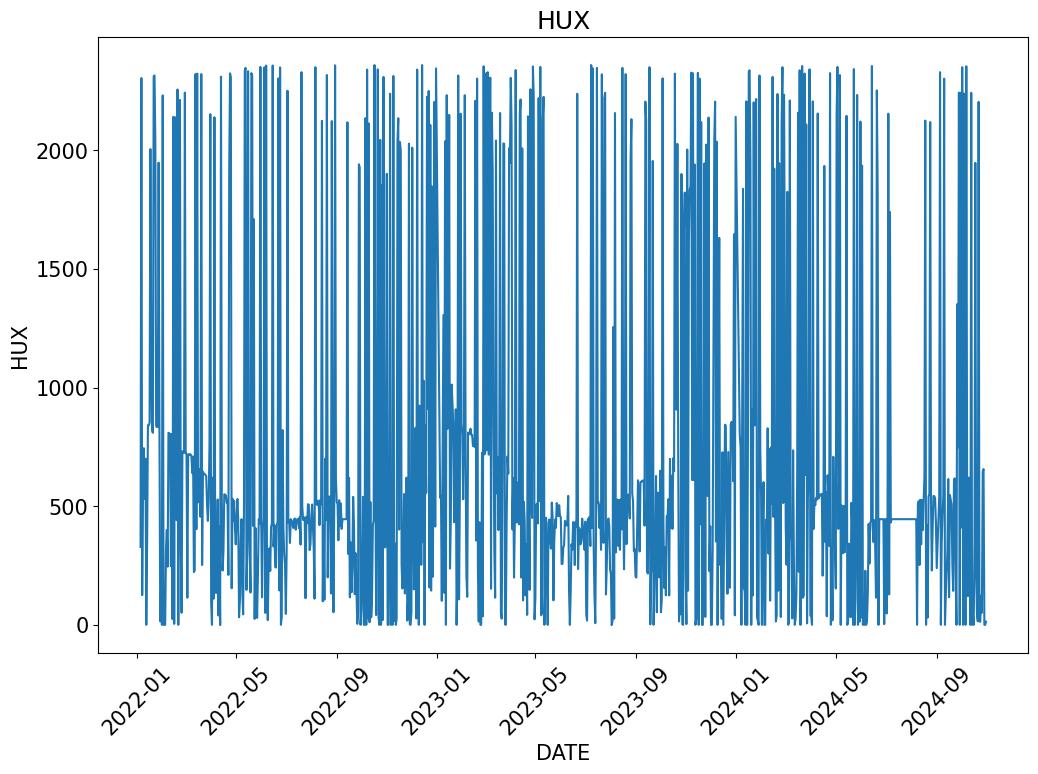

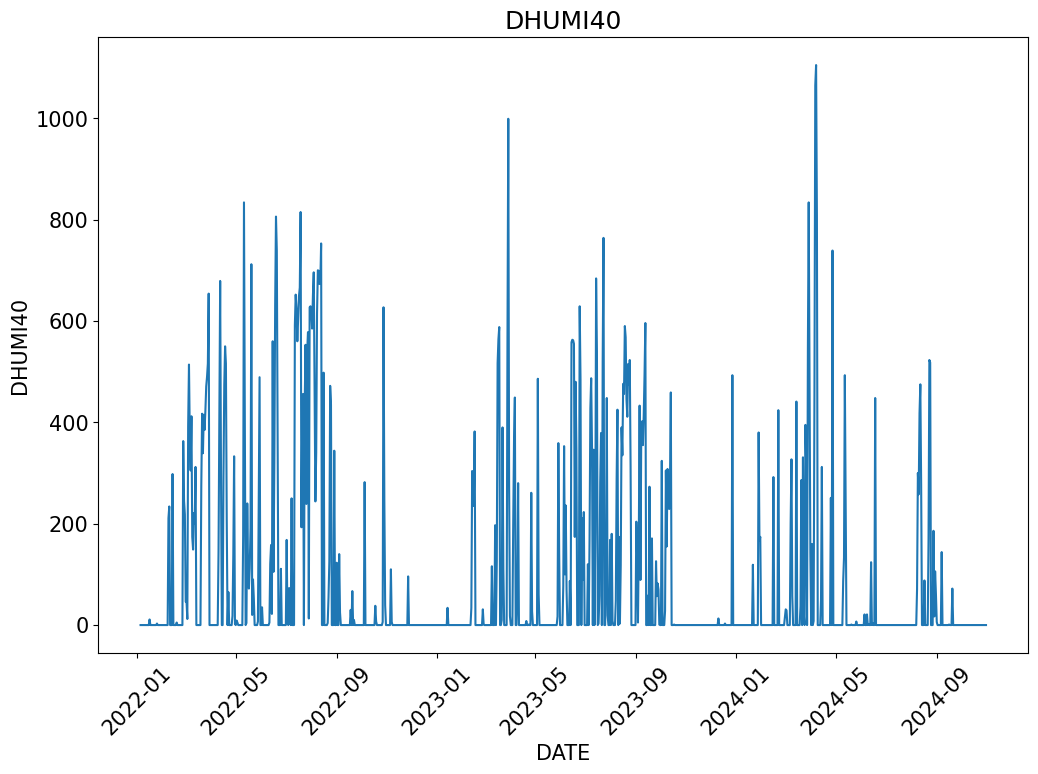

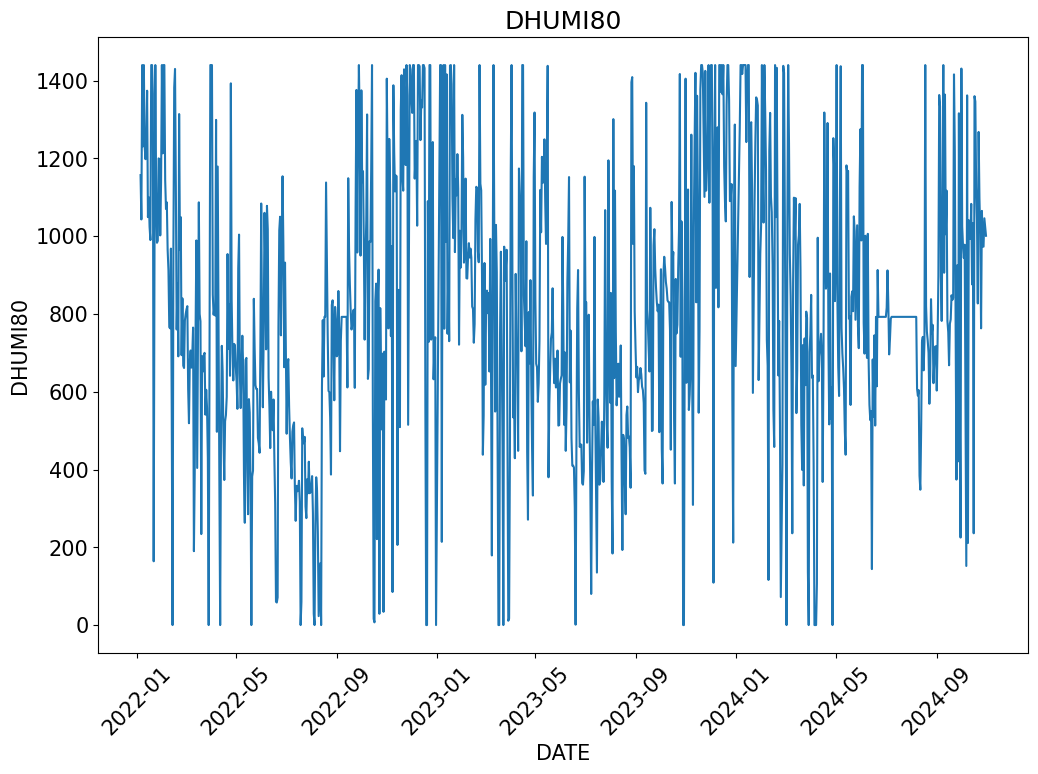

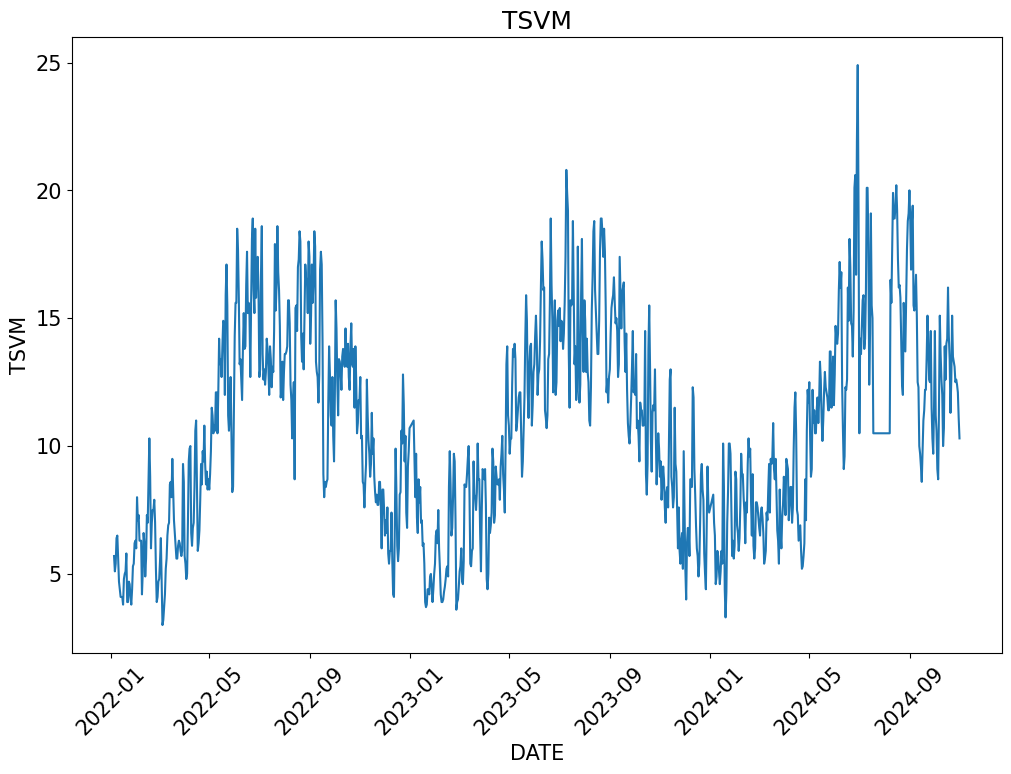

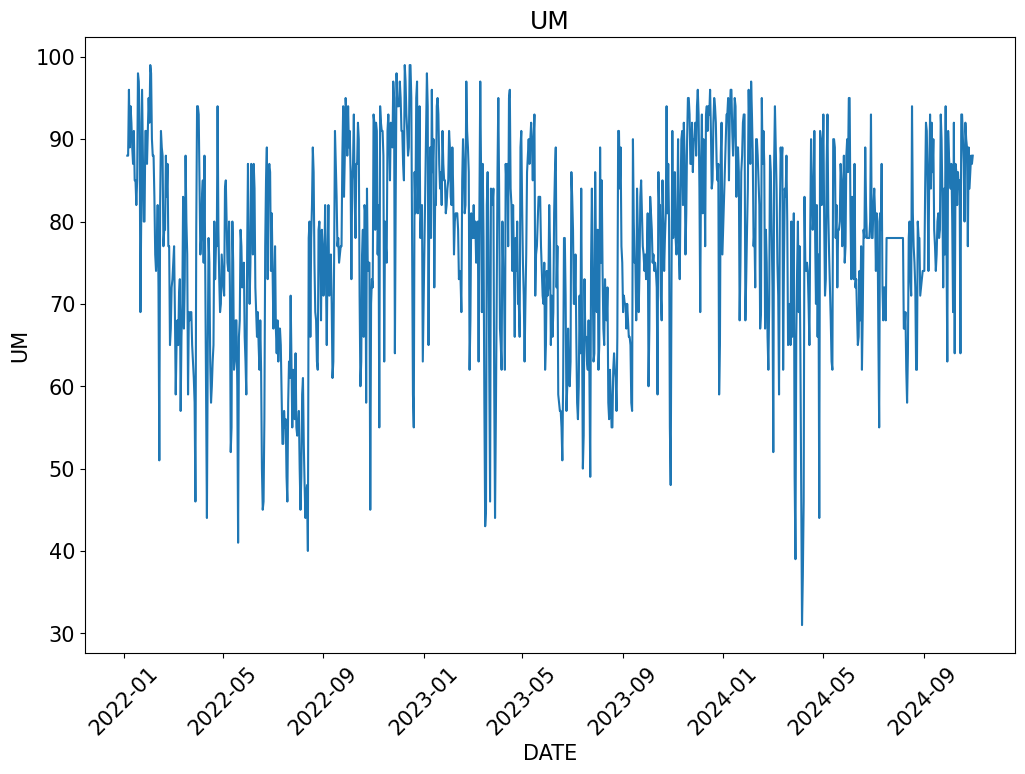

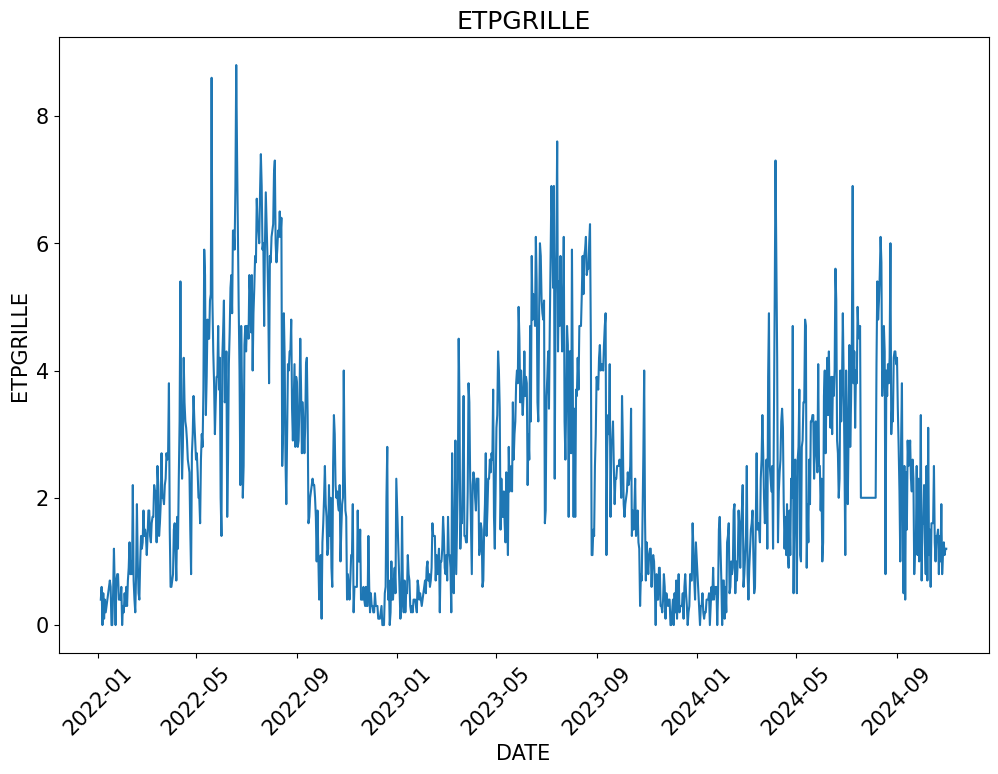

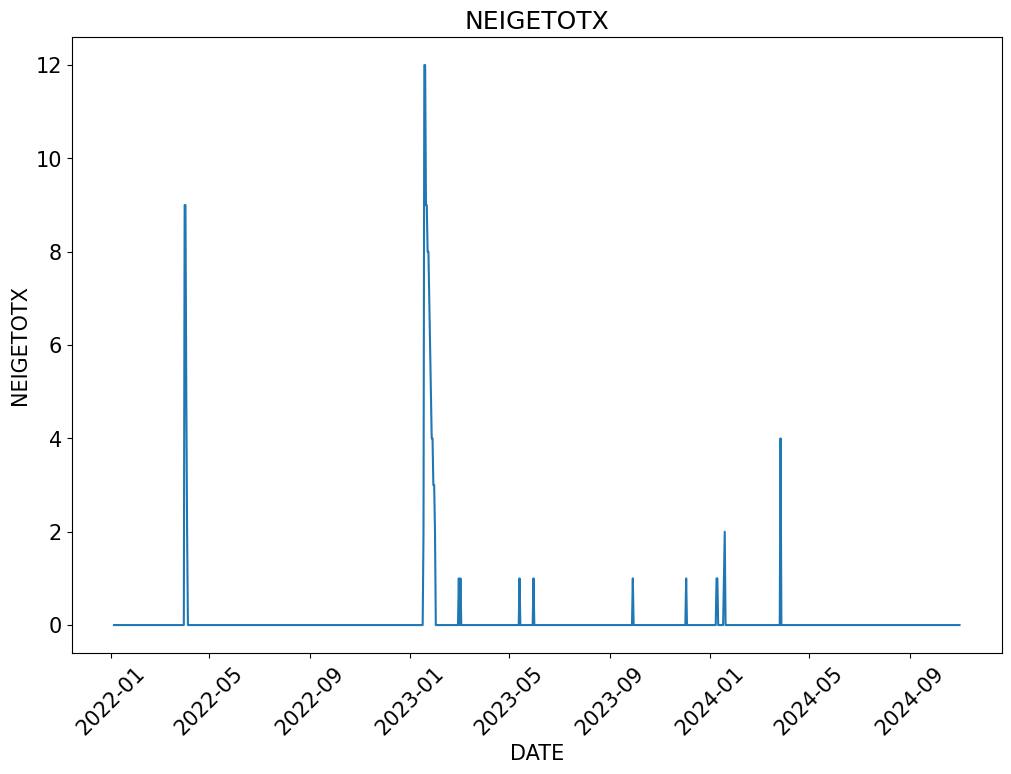

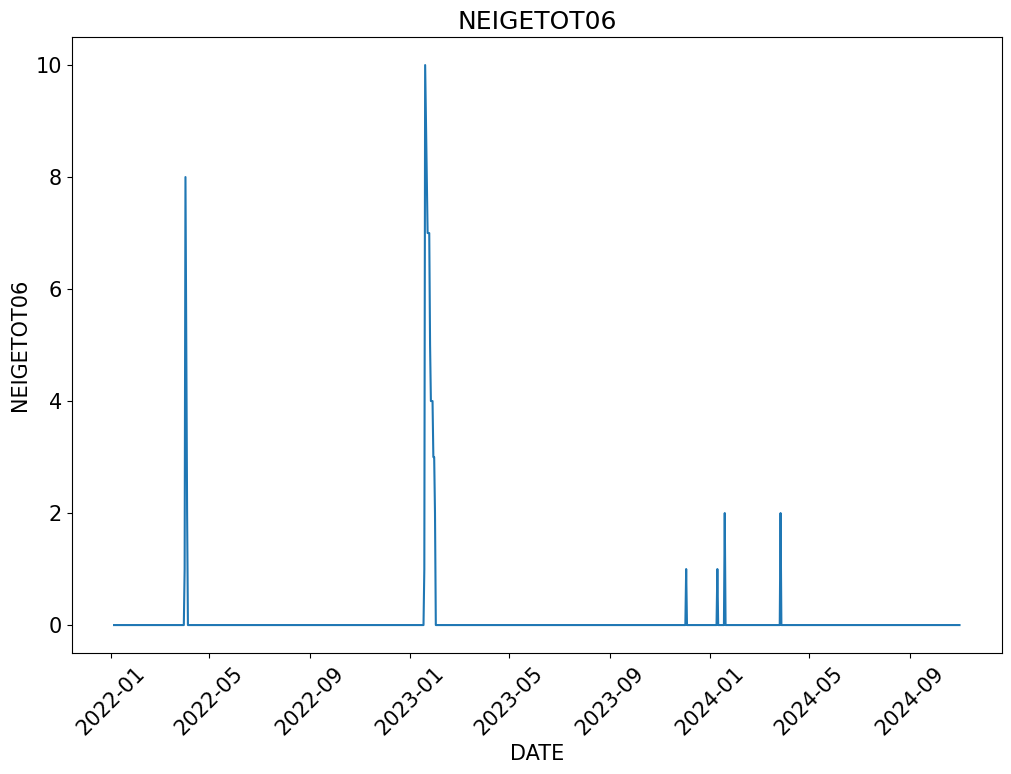

In [92]:
# Visualizing the behavior of all columns
columns = df_c.drop(columns='DATE').columns
for column in columns:
    f.sns.lineplot(x=df_c['DATE'], y=df_c[column])
    f.plt.xticks(rotation=45)
    f.plt.title(column)
    f.plt.show()

In [93]:
# Function to convert our dataset in a time series dataset
def create_window(target, feature, window=1, offset=0):
    feature_new, target_new = [], []
    feature_np = feature.to_numpy()
    target_np = target.to_numpy()
    for i in range(window, target.shape[0] - offset):
        feature_list = feature_np[i - window:i]
        feature_new.append(feature_list.reshape(window, feature_np.shape[1]))
        target_new.append(target_np[i+offset].reshape(1))
    return np.array(feature_new), np.array(target_new)

In [94]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow import nn

In [136]:
# scale all the dataset (not including the date)
scaler = f.StandardScaler()
df_scaled = scaler.fit_transform(df_c.drop(columns='DATE'))
df_scaled = f.pd.DataFrame(df_scaled, columns=df_c.drop(columns='DATE').columns)

# Set the window to 10
window = 10
feature_columns = ['RR', 'TN', 'HTN', 'DG', 'TAMPLI',
       'FFM', 'FXI', 'DXI', 'HXI', 'FXY', 'DXY', 'HXY', 'FXI3S', 'HXI3S', 'UN',
       'HUN', 'UX', 'HUX', 'DHUMI40', 'DHUMI80', 'TSVM', 'UM', 'ETPGRILLE',
       'NEIGETOTX', 'NEIGETOT06']

# Create a window with all the columns as features (excluding the date)
feature, target = create_window(df_scaled['TM'],df_scaled[feature_columns], window=window)
print(feature[0])
print(target[0])
print(df_scaled.head(12))

[[-1.45555566e-01 -8.75832838e-01  1.40001758e+00  8.34363864e-01
  -1.52458447e+00  6.03369147e-01 -7.46105629e-02  9.78041010e-01
  -1.06665514e+00  3.34492734e-01  1.20920809e+00 -4.98220526e-01
   3.32505020e-02 -1.06396840e+00  7.60913731e-01 -2.02201216e-02
   4.23006718e-01 -5.20901580e-01 -4.88202398e-01  9.55055047e-01
  -1.25716261e+00  9.00249163e-01 -1.12346998e+00 -1.36105786e-01
  -1.24370697e-01]
 [-5.10261131e-01 -1.19348597e+00  1.38118879e+00  2.70707050e+00
  -1.02468863e+00  2.81865879e-01 -2.27208077e-02  9.78041010e-01
   1.99264271e-01  5.01466802e-01  1.20920809e+00  1.93693996e-01
   6.35645190e-02  2.03431801e-01  1.05151681e+00 -5.73652717e-01
   4.23006718e-01  2.11202990e+00 -4.88202398e-01  6.34599229e-01
  -1.40751018e+00  9.00249163e-01 -1.00935316e+00 -1.36105786e-01
  -1.24370697e-01]
 [ 8.92452579e-01 -1.85904493e+00 -1.07733341e-01  1.76257498e+00
  -7.41414327e-01 -6.82643926e-01 -9.30791524e-01 -9.08362221e-01
   2.01361132e+00 -9.45641784e-01 -5.7

In [114]:
# Standardizing the size of all images 
f.plt.rcParams['figure.figsize'] = (15,9)
f.plt.rcParams['font.size'] = 15

In [115]:
# Function to create train and test datasets
def train_test(feature, target, perc_train = 0.8):
    size_train = int(len(feature) * perc_train)

    x_train = feature[0:size_train]
    y_train = target[0:size_train]

    x_test = feature[size_train: len(feature)]
    y_test = target[size_train: len(feature)]

    return x_train, x_test, y_train, y_test

<Axes: xlabel='DATE'>

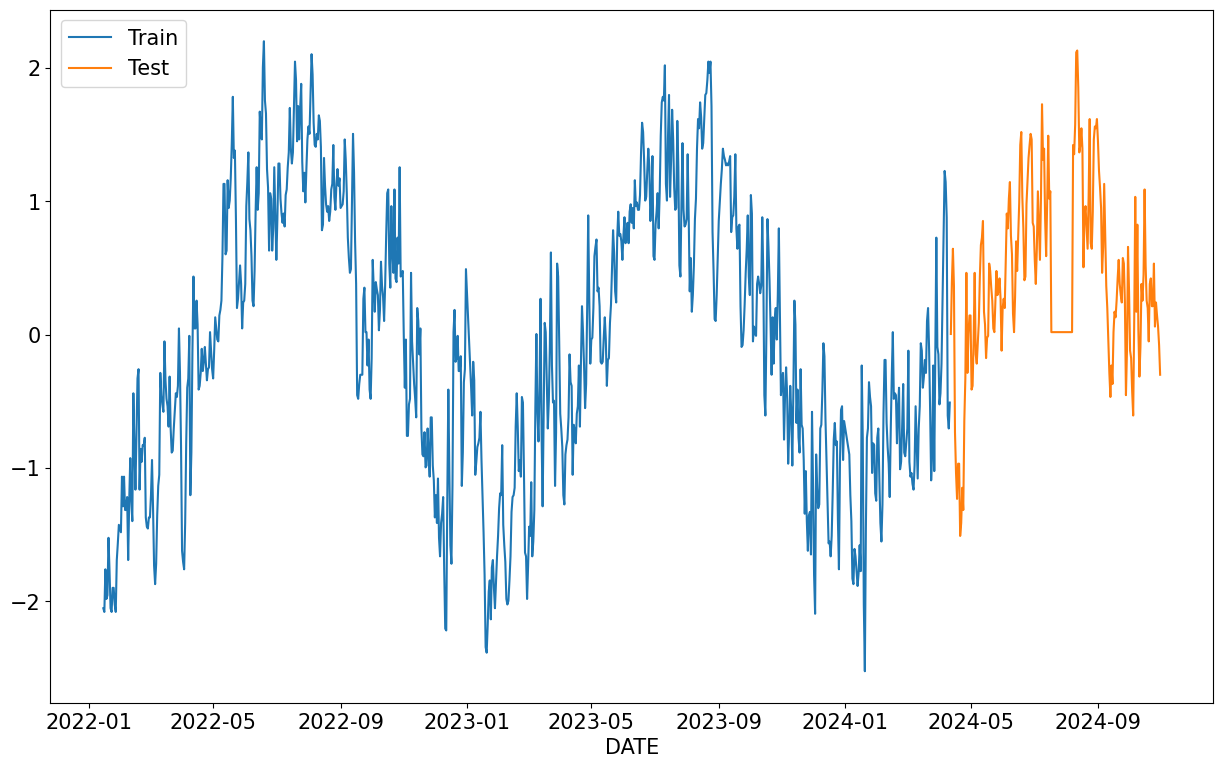

In [116]:
x_train, x_test, y_train, y_test = train_test(feature, target)

# Visualize the train and test data
f.sns.lineplot(x=df_c['DATE'].iloc[window:len(y_train) + window], y=y_train[:,0], label='Train')
f.sns.lineplot(x=df_c['DATE'].iloc[window + len(y_train):], y=y_test[:,0], label='Test')

**Prediction**

*Using all the features*

In [117]:
# Create a standard model using LSTM
def model_lstm(x_shape):

    model = keras.Sequential()
    model.add(keras.layers.LSTM(64, input_shape=(x_shape[1], x_shape[2])))
    model.add(keras.layers.Dense(units=1))

    model.compile(loss='mean_squared_error', optimizer='RMSProp')
    return model

In [118]:
model = model_lstm(x_train.shape)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        23,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,105 (90.25 KB)

 Trainable params: 23,105 (90.25 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
result = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.5415 - val_loss: 0.2274
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1515 - val_loss: 0.1903
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1377 - val_loss: 0.1693
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1315 - val_loss: 0.1765
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1055 - val_loss: 0.1570
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1023 - val_loss: 0.1552
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0886 - val_loss: 0.1595
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0867 - val_loss: 0.1429
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0809 - val_loss: 0.1528
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0769 - val_loss: 0.1499
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0704 - val_loss: 0.1507
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0647 - val_l

In [120]:
# Function to print the results of the fit process
def print_loss(result):
    f.plt.plot(result.history['loss'])
    f.plt.plot(result.history['val_loss'])
    f.plt.legend(['Train', 'Test'])
    f.plt.xlabel('Epochs')
    f.plt.ylabel('Cost')
    f.plt.show()

# Function to print the y_predicted compared with the y_test
def print_test_x_prediction(y_test, y_predict, df_date, train_size, window=0):
    f.sns.lineplot(x=df_date.iloc[train_size + window:], y=y_test[:,0], label = 'Test')
    f.sns.lineplot(x=df_date.iloc[train_size + window:], y=y_predict[:,0], label = 'Predict')
    f.plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


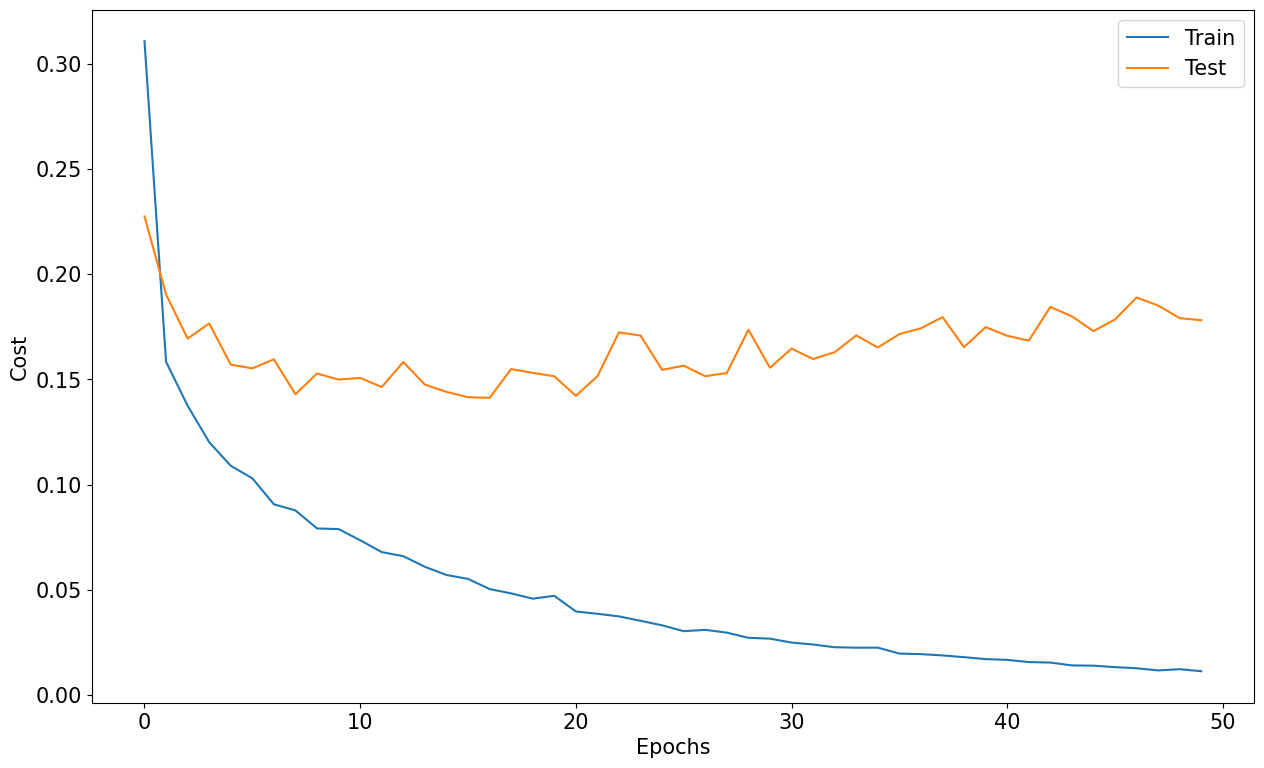

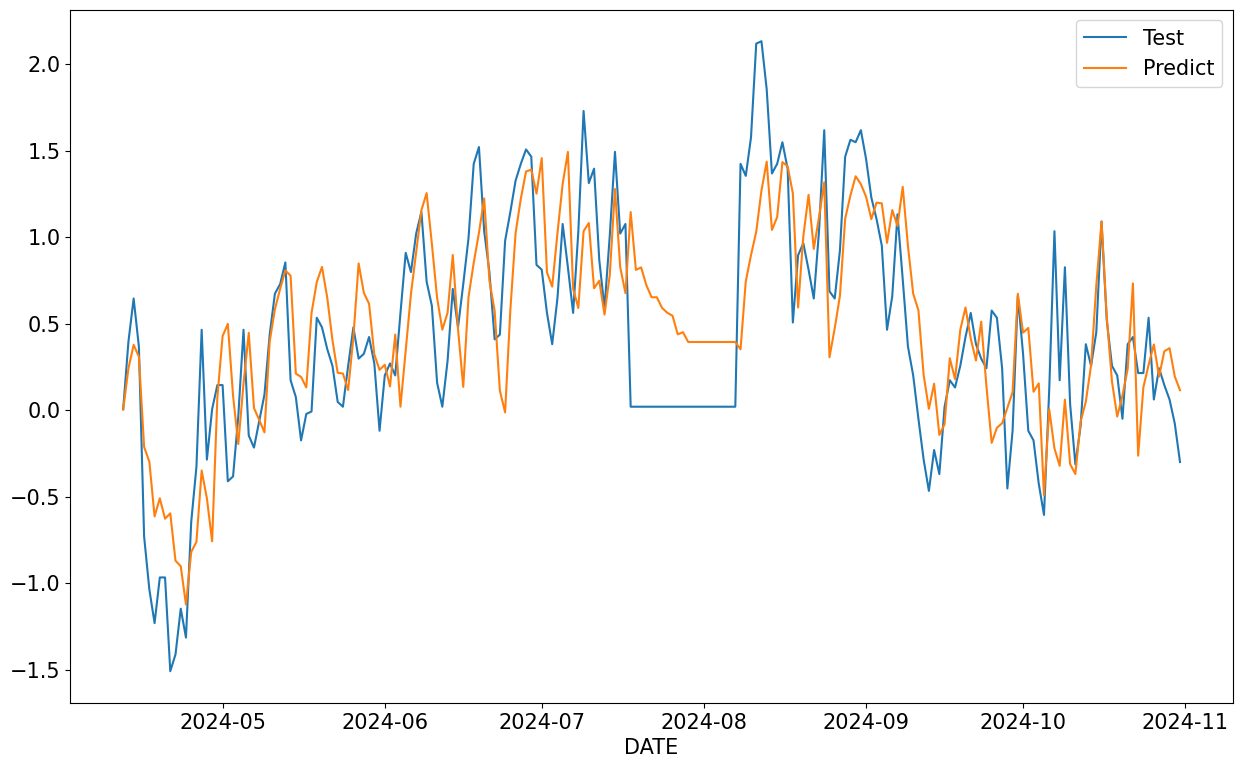

In [121]:
y_predict = model.predict(x_test)

print_loss(result)
print_test_x_prediction(y_test, y_predict, df_c['DATE'], len(y_train), window=window)

*Using only the target*

In [122]:
feature, target = create_window(df_scaled['TM'], df_scaled[['TM']], window=10)

x_train, x_test, y_train, y_test = train_test(feature, target)

model = model_lstm(x_train.shape)
result = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.7021 - val_loss: 0.3009
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2545 - val_loss: 0.2778
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2234 - val_loss: 0.2391
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2105 - val_loss: 0.2218
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2010 - val_loss: 0.2024
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1657 - val_loss: 0.2100
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1717 - val_loss: 0.1824
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1683 - val_loss: 0.1651
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1575 - val_loss: 0.1571
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1519 - val_loss: 0.1610
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1385 - val_loss: 0.1567
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


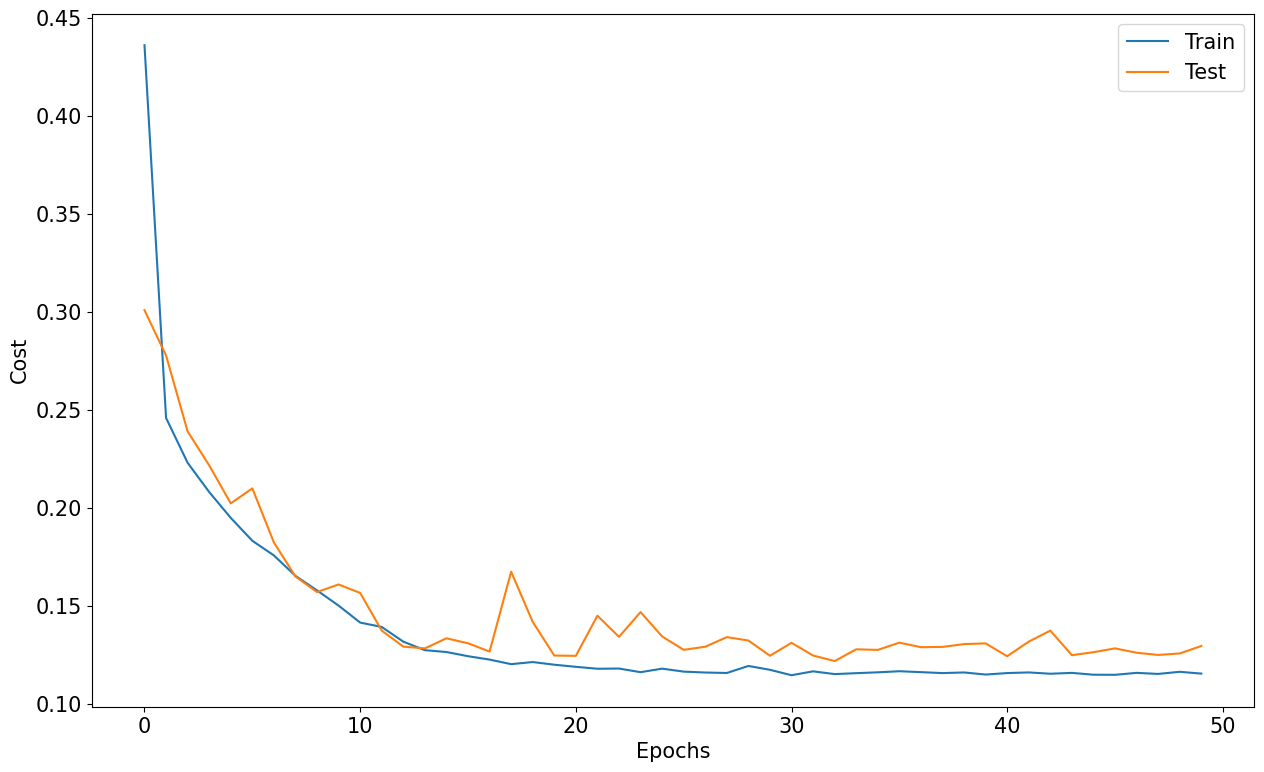

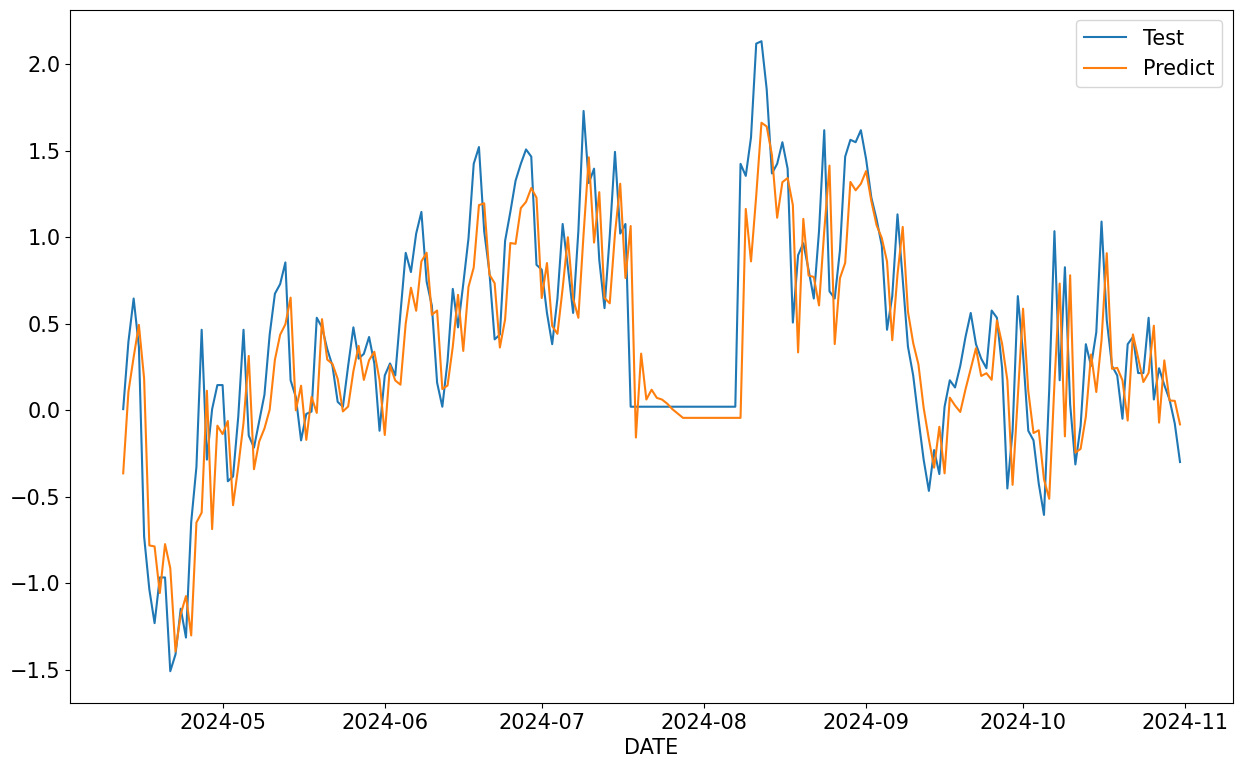

In [123]:
y_predict = model.predict(x_test)

print_loss(result)
print_test_x_prediction(y_test, y_predict, df_c['DATE'], len(y_train), window=window)

In [124]:
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)

Shape of X_train: (809, 10, 1)
Shape of X_test: (203, 10, 1)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1])  
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1])

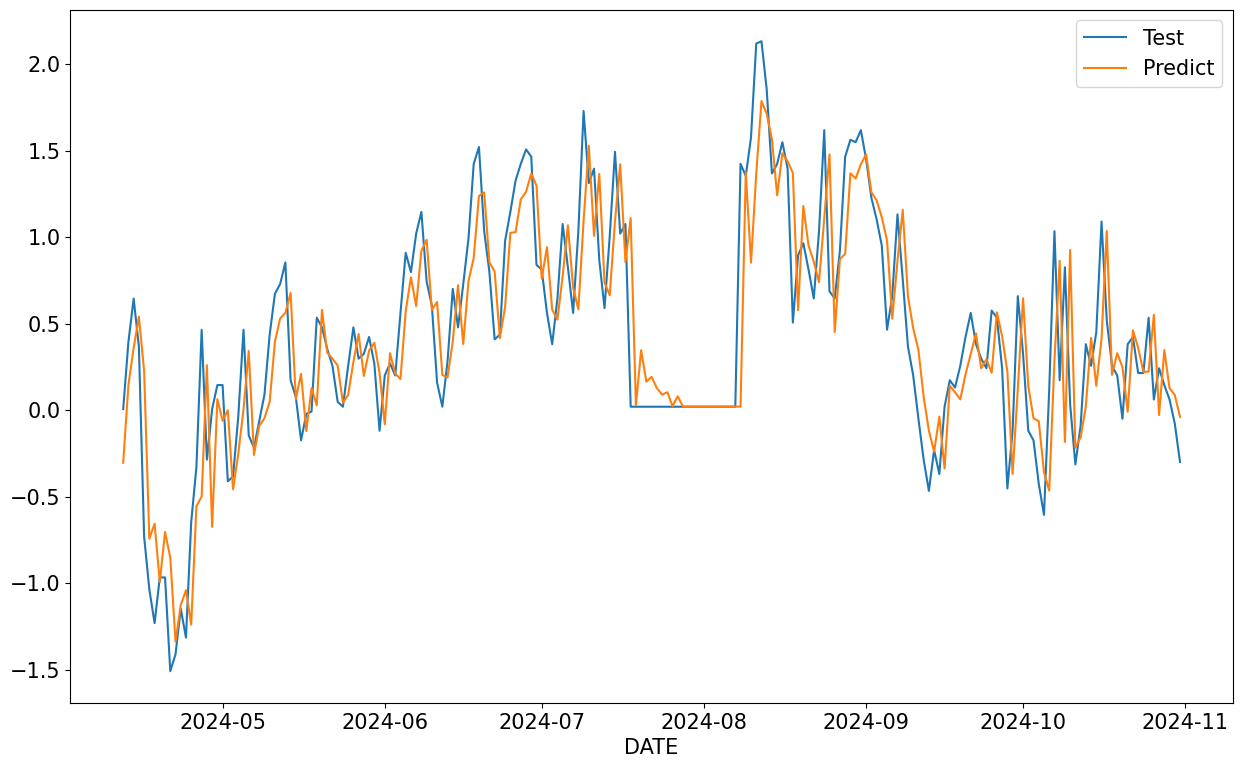

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_linear_reg = LinearRegression().fit(x_train, y_train)
y_predict = model_linear_reg.predict(x_test)


print_test_x_prediction(y_test, y_predict, df_c['DATE'], len(y_train), window=window)

In [128]:
y_predict.shape

(203, 1)

In [129]:
y_test.shape

(203, 1)

In [131]:
# Évaluation du modèle
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.12607187119359356
R-squared (R²): 0.7065858789192729


<Axes: xlabel='DATE'>

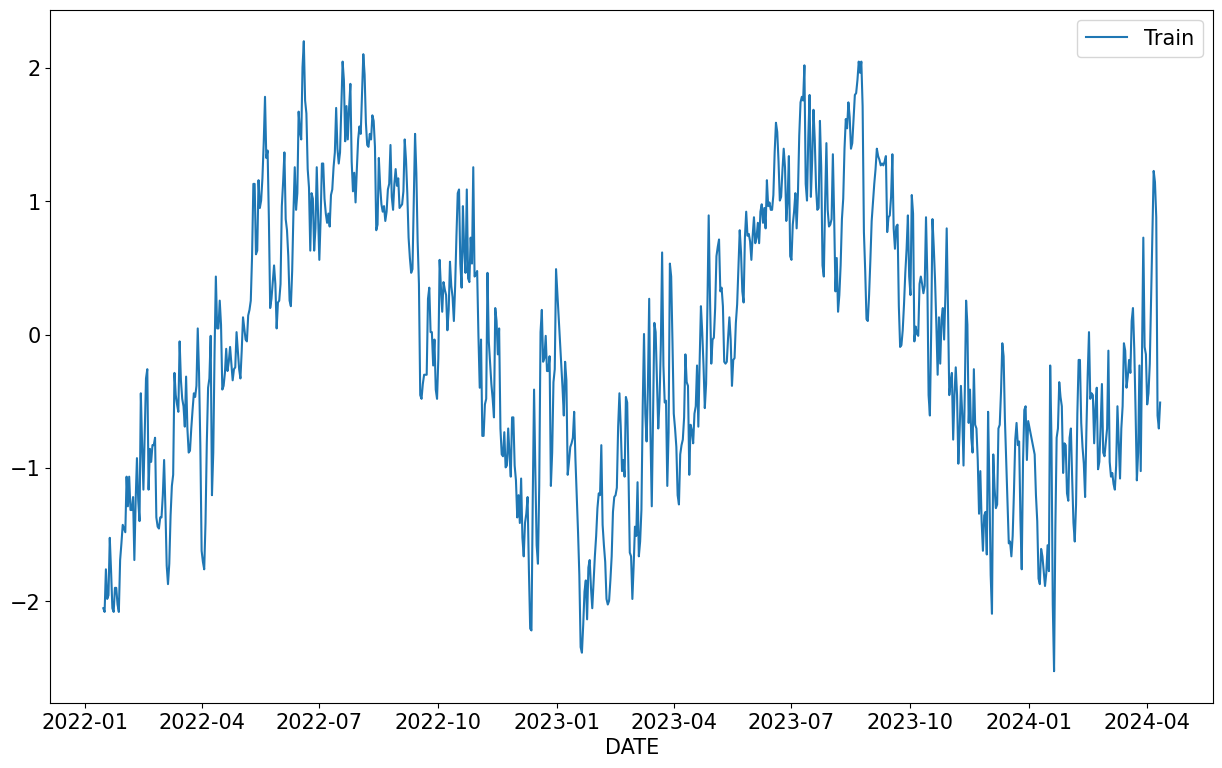

In [132]:
sns.lineplot(x=df_c['DATE'].iloc[window:len(y_train) + window], y=y_train[:,0], label='Train')

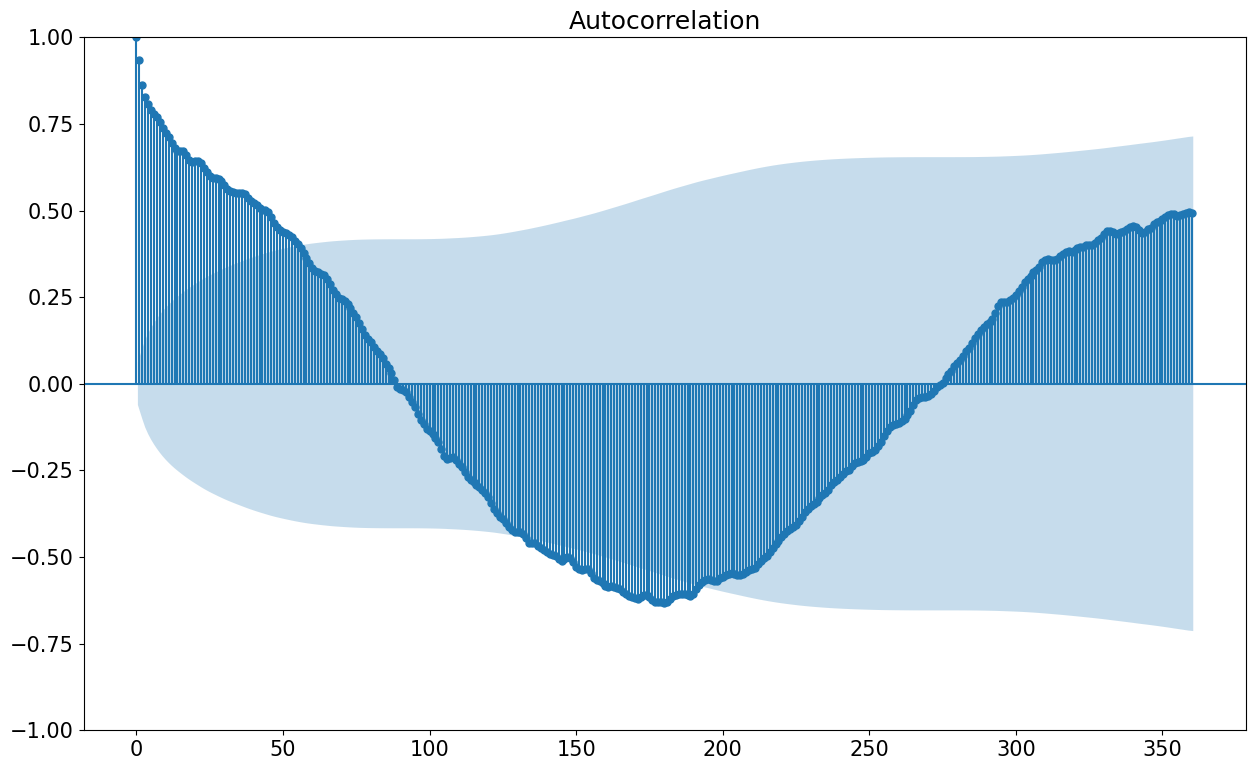

In [135]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_c['TM'], lags=360)
plt.show()


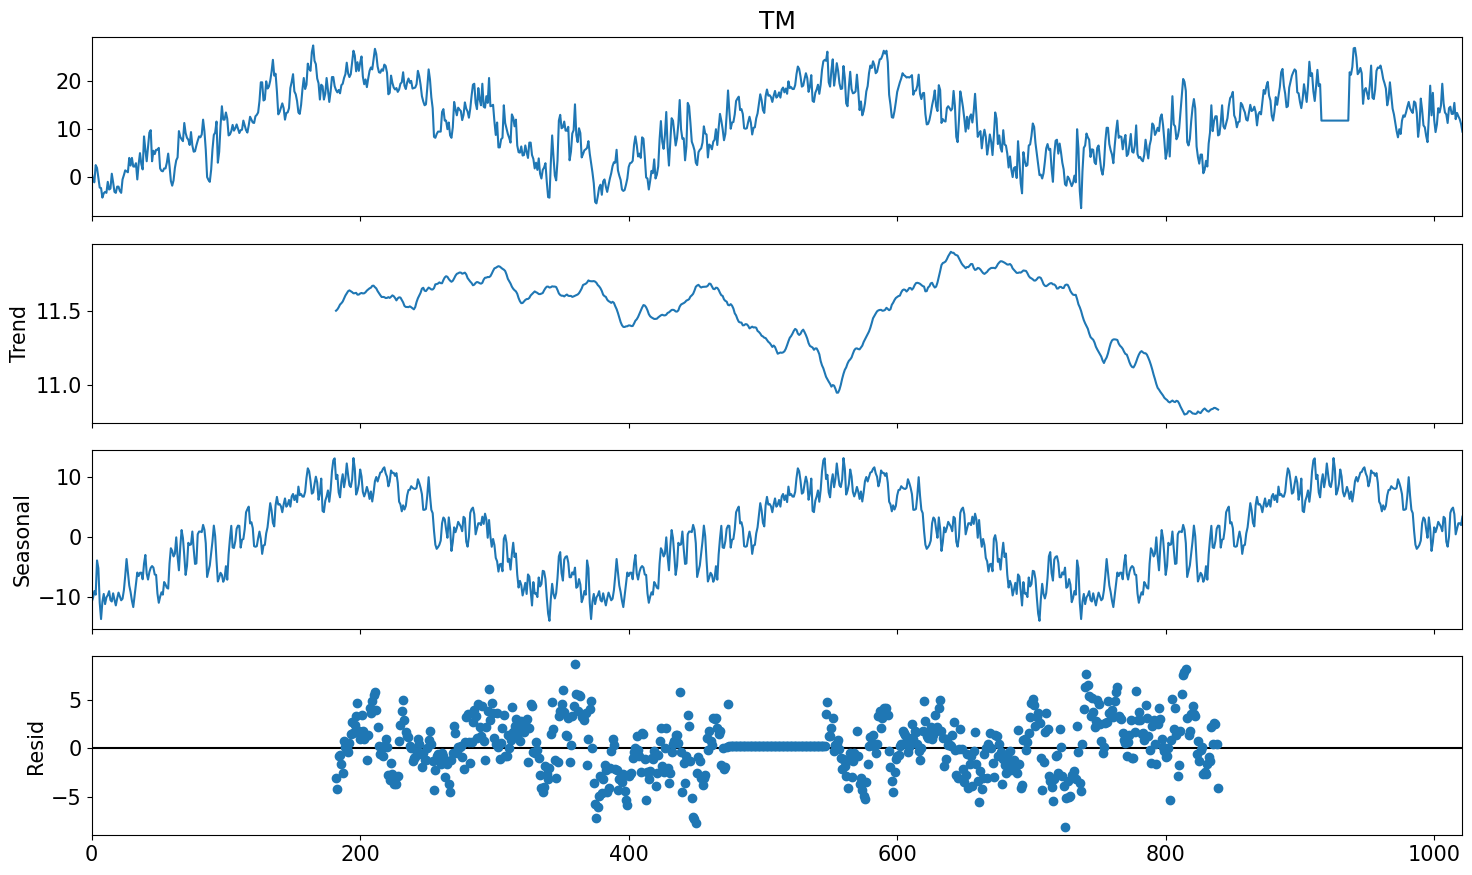

In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Décomposer la série (assurez-vous qu'elle a une fréquence définie)
result = seasonal_decompose(df_c['TM'], model='additive', period=365)  # Période 12 pour des données mensuelles
result.plot()
plt.show()


## 7. Features selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=10).fit(x_train, y_train)

In [20]:
# Function to create train and test datasets
def train_test(feature, target, perc_train = 0.8):
    size_train = int(len(feature) * perc_train)

    x_train = feature[0:size_train]
    y_train = target[0:size_train]

    x_test = feature[size_train: len(feature)]
    y_test = target[size_train: len(feature)]

    return x_train, x_test, y_train, y_test

In [25]:
x_train, x_test, y_train, y_test = train_test(df_c.drop(columns='DATE'), df_c['TM'])

In [26]:
x_train.head()

RR   TN     HTN   TX     HTX   TM  TMNX     DG  TAMPLI  TNTXM  ...  \
POSTE                                                                     ...   
1014002   2.6 -0.4  1759.0  3.4  1217.0  0.9  1.50  389.0     3.8    1.5  ...   
1014002   0.0 -2.5  1746.0  4.3  1327.0 -0.6  0.90  964.0     6.8    0.9  ...   
1014002  10.0 -6.9   718.0  1.6  2229.0 -1.2 -2.65  674.0     8.5   -2.7  ...   
1014002  13.2 -0.7   733.0  6.3  2319.0  2.4  2.80   87.0     7.0    2.8  ...   
1014002   7.6  0.4   737.0  2.2   601.0  1.8  1.30    0.0     1.8    1.3  ...   

            HUN    UX     HUX  DHUMI40  DHUMI80  TSVM    UM  ETPGRILLE  \
POSTE                                                                    
1014002  1244.0  99.0   329.0      0.0   1157.0   5.7  88.0        0.4   
1014002  1032.0  99.0  2304.0      0.0   1043.0   5.1  88.0        0.6   
1014002   708.0  99.0   126.0      0.0   1440.0   5.4  96.0        0.0   
1014002  1403.0  99.0   618.0      0.0   1231.0   6.4  89.0        0.5   
1014002     3.0  98.0   745.0      0.0   1440.0   6.5  94.0        0.1   

         NEIGETOTX  NEIGETOT06  
POSTE                           
1014002        0.0         0.0  
1014002        0.0         0.0  
1014002        0.0         0.0  
1014002        0.0         0.0  
1014002        0.0         0.0  

[5 rows x 30 columns]

In [27]:
x_test

RR   TN     HTN    TX     HTX    TM   TMNX     DG  TAMPLI  TNTXM  \
POSTE                                                                        
1014002  0.0  1.6   522.0  12.6  1329.0   6.5   7.10    0.0    11.0    7.1   
1014002  0.0 -1.2   503.0  17.6  1546.0   7.9   8.20  241.0    18.8    8.2   
1014002  0.2  0.4   433.0  22.7  1325.0  11.6  11.55    0.0    22.3   11.6   
1014002  0.0  3.1   348.0  26.8  1423.0  14.4  14.95    0.0    23.7   15.0   
1014002  0.0  3.5   320.0  27.6  1343.0  16.2  15.55    0.0    24.1   15.6   
...      ...  ...     ...   ...     ...   ...    ...    ...     ...    ...   
1014002  0.2  5.7   633.0  21.9  1354.0  13.3  13.80    0.0    16.2   13.8   
1014002  0.2  6.7   546.0  21.9  1236.0  12.6  14.30    0.0    15.2   14.3   
1014002  0.4  6.4  2251.0  21.7  1236.0  12.0  14.05    0.0    15.3   14.1   
1014002  0.2  4.9   632.0  21.8  1253.0  11.0  13.35    0.0    16.9   13.4   
1014002  0.0  2.9   657.0  20.2  1341.0   9.4  11.55    0.0    17.3   11.6   

         ...     HUN     UX    HUX  DHUMI40  DHUMI80  TSVM    UM  ETPGRILLE  \
POSTE    ...                                                                  
1014002  ...  1332.0   97.0  533.0      0.0    627.0   7.0  75.0        2.1   
1014002  ...  1116.0   97.0  546.0      0.0    691.0   7.6  74.0        2.4   
1014002  ...  1313.0   98.0  550.0      0.0    722.0   9.9  75.0        2.6   
1014002  ...  1402.0   98.0  545.0     49.0    749.0  11.5  74.0        3.2   
1014002  ...  1633.0   98.0  553.0    312.0    691.0  12.1  70.0        3.4   
...      ...     ...    ...    ...      ...      ...   ...   ...        ...   
1014002  ...  1344.0  100.0  646.0      0.0    974.0  12.6  84.0        1.1   
1014002  ...  1346.0  100.0  657.0      0.0    973.0  12.4  86.0        1.3   
1014002  ...  1226.0  100.0    1.0      0.0   1046.0  12.1  88.0        1.1   
1014002  ...  1200.0  100.0    1.0      0.0   1022.0  11.1  87.0        1.2   
1014002  ...  1330.0  100.0   14.0      0.0   1001.0  10.3  88.0        1.2   

         NEIGETOTX  NEIGETOT06  
POSTE                           
1014002        0.0         0.0  
1014002        0.0         0.0  
1014002        0.0         0.0  
1014002        0.0         0.0  
1014002        0.0         0.0  
...            ...         ...  
1014002        0.0         0.0  
1014002        0.0         0.0  
1014002        0.0         0.0  
1014002        0.0         0.0  
1014002        0.0         0.0  

[205 rows x 30 columns]

In [28]:
y_train.head()

POSTE
1014002    0.9
1014002   -0.6
1014002   -1.2
1014002    2.4
1014002    1.8
Name: TM, dtype: float64